*******************************************************************************************************
*******************************************************************************************************
# PROJECT (code)

**A comparison and application of machine learning techniques towards the analysis of UCI's diabetes prediction dataset.**

In [1]:
# Python libraries for data pre-processing
import pandas as pd
import numpy as np

# Python libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
df6 = pd.read_csv('diabetes.csv')

# Data Preprocessing

In [3]:
df6.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Checking for Missing Values MV: 
df6.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Checking for duplicated rows
duplicates = df6[df6.duplicated()]
print("Number of duplicate rows :: ", duplicates.shape)

Number of duplicate rows ::  (0, 9)


In [7]:
df6.shape

(768, 9)

# Exploratory Data Analysis (EDA)

In [8]:
# Converting categorical attributes to text for better data exploratory and visualization

df6['Outcome'][df6['Outcome'] == 0] = 'Not_Diabetic'
df6['Outcome'][df6['Outcome'] == 1] = 'Diabetic'

In [9]:
# Data.head visualization of modification to categorical attributes
df6.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age       Outcome  
0                     0.627   50      Diabetic  
1                     0.351   31  Not_Diabetic  
2                     0.672   32      Diabetic  
3                     0.167   21  Not_Diabetic  
4                     2.288   33      Diabetic

In [10]:
df6.shape

(768, 9)

**Distribution of Patients ('Outcome' Attribute)**

In [11]:
df6.groupby('Outcome').size()


Outcome
Diabetic        268
Not_Diabetic    500
dtype: int64

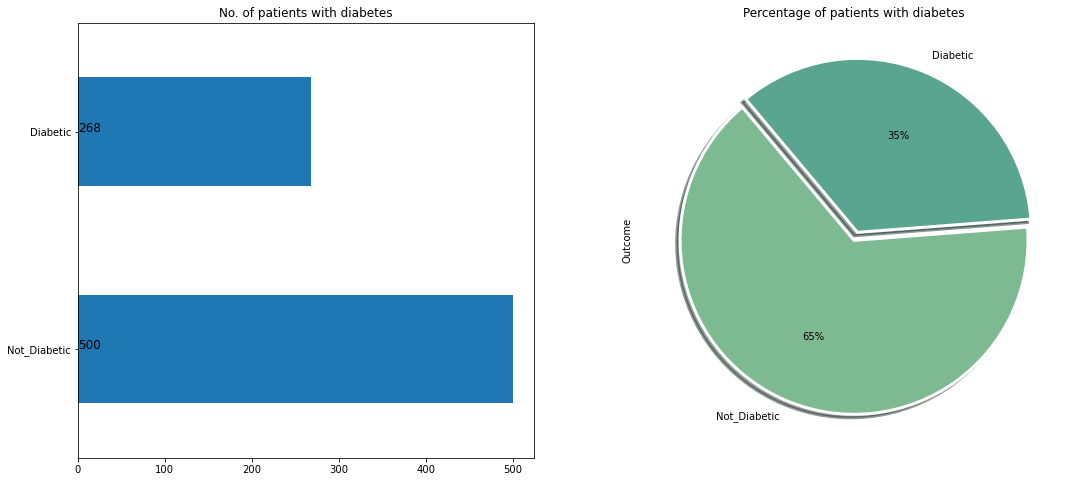

In [12]:
# plotting the distribution of 'Outcome' attribute along those with and without diabetes
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(18,8))

ax1 = df6["Outcome"].value_counts().plot(kind="barh", ax =ax1)
for i,j in enumerate(df6["Outcome"].value_counts().values):
    ax1.text(.5,i,j,fontsize=12)
ax1.set(title = 'No. of patients with diabetes')


ax2 = df6['Outcome'].value_counts().plot.pie(colors = sns.color_palette("crest"), 
                   autopct = "%1.0f%%", startangle = 130, wedgeprops={"linewidth":3,"edgecolor":"w"},
                                               explode=[.0,.1/2], shadow=True);
ax2.set(title = 'Percentage of patients with diabetes')

plt.show()

# Analysis of Numerical Attributes

In [13]:
#A discription of numberical attributes
df6.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  
min      0.000000                  0.078000   21.000000  
25%     27.300000                  0.243750   24.000000  
50%     32.000000                  0.372500   29.000000  
75%     36.600000                  0.626250   41.000000  
max     67.100000                  2.420000   81.000000

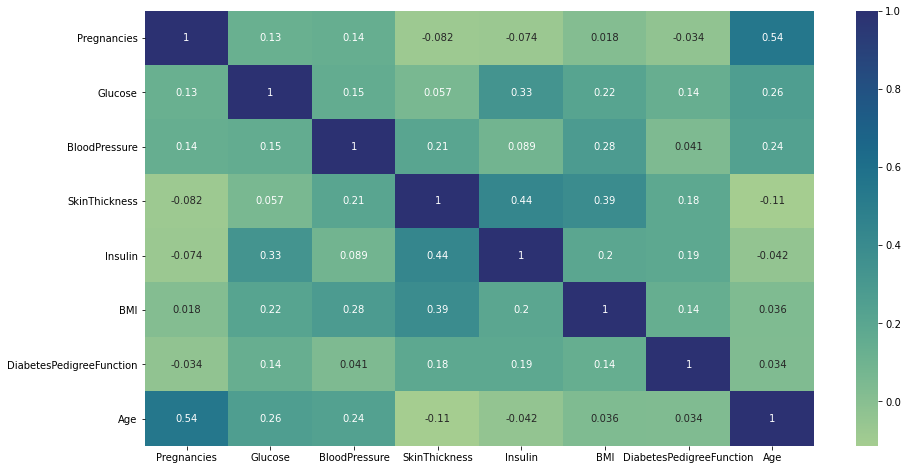

In [14]:
# A correletional heatmap of numberical attributes
plt.figure(figsize=(15,8))
sns.heatmap(df6.corr(), annot=True, cmap='crest', )
plt.show()

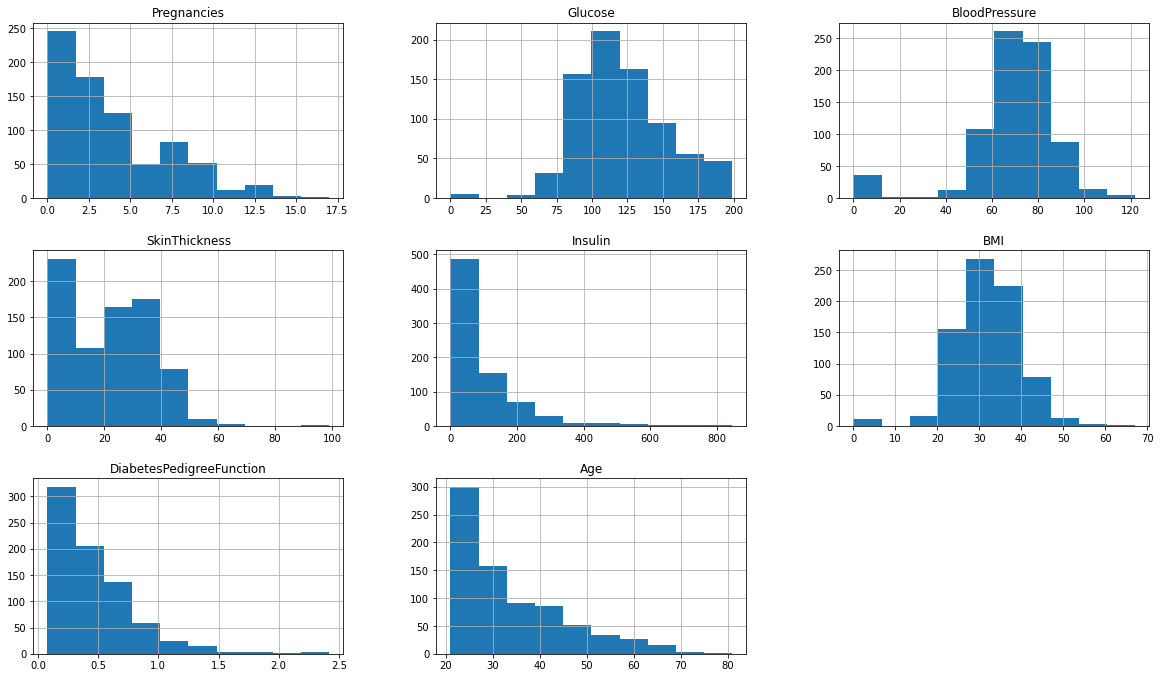

In [15]:
df6.hist(figsize=(20,20), layout=(5,3));

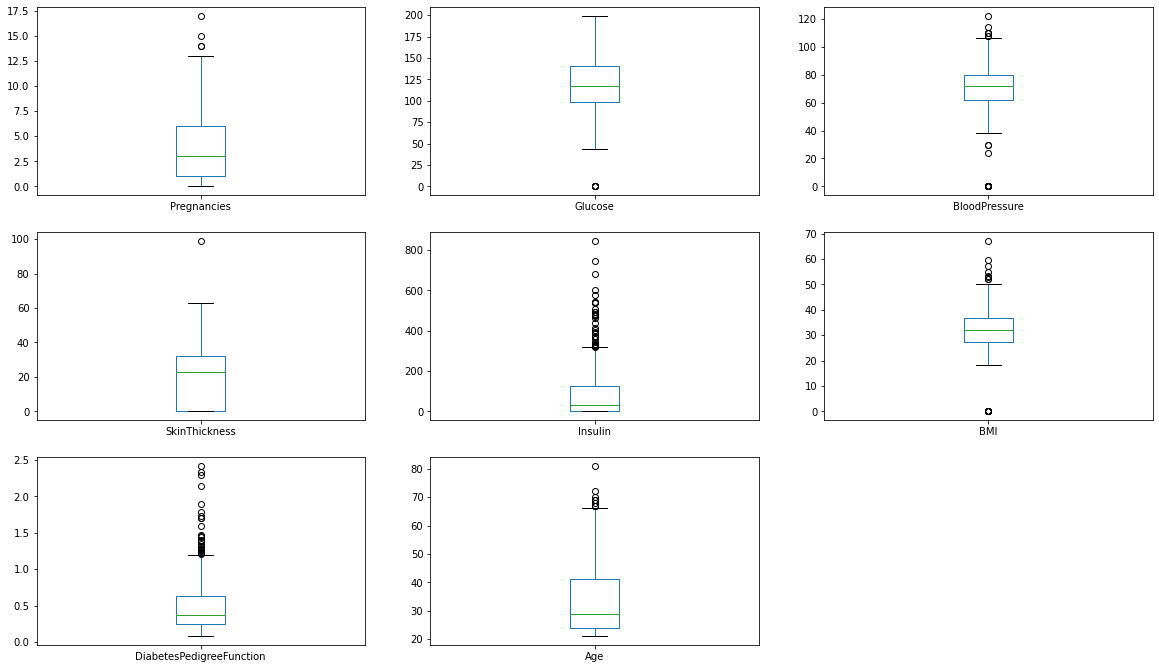

In [16]:
# box and whiskers plot
df6.plot(kind='box', subplots=True, layout=(5,3), figsize=(20,20))
plt.show()

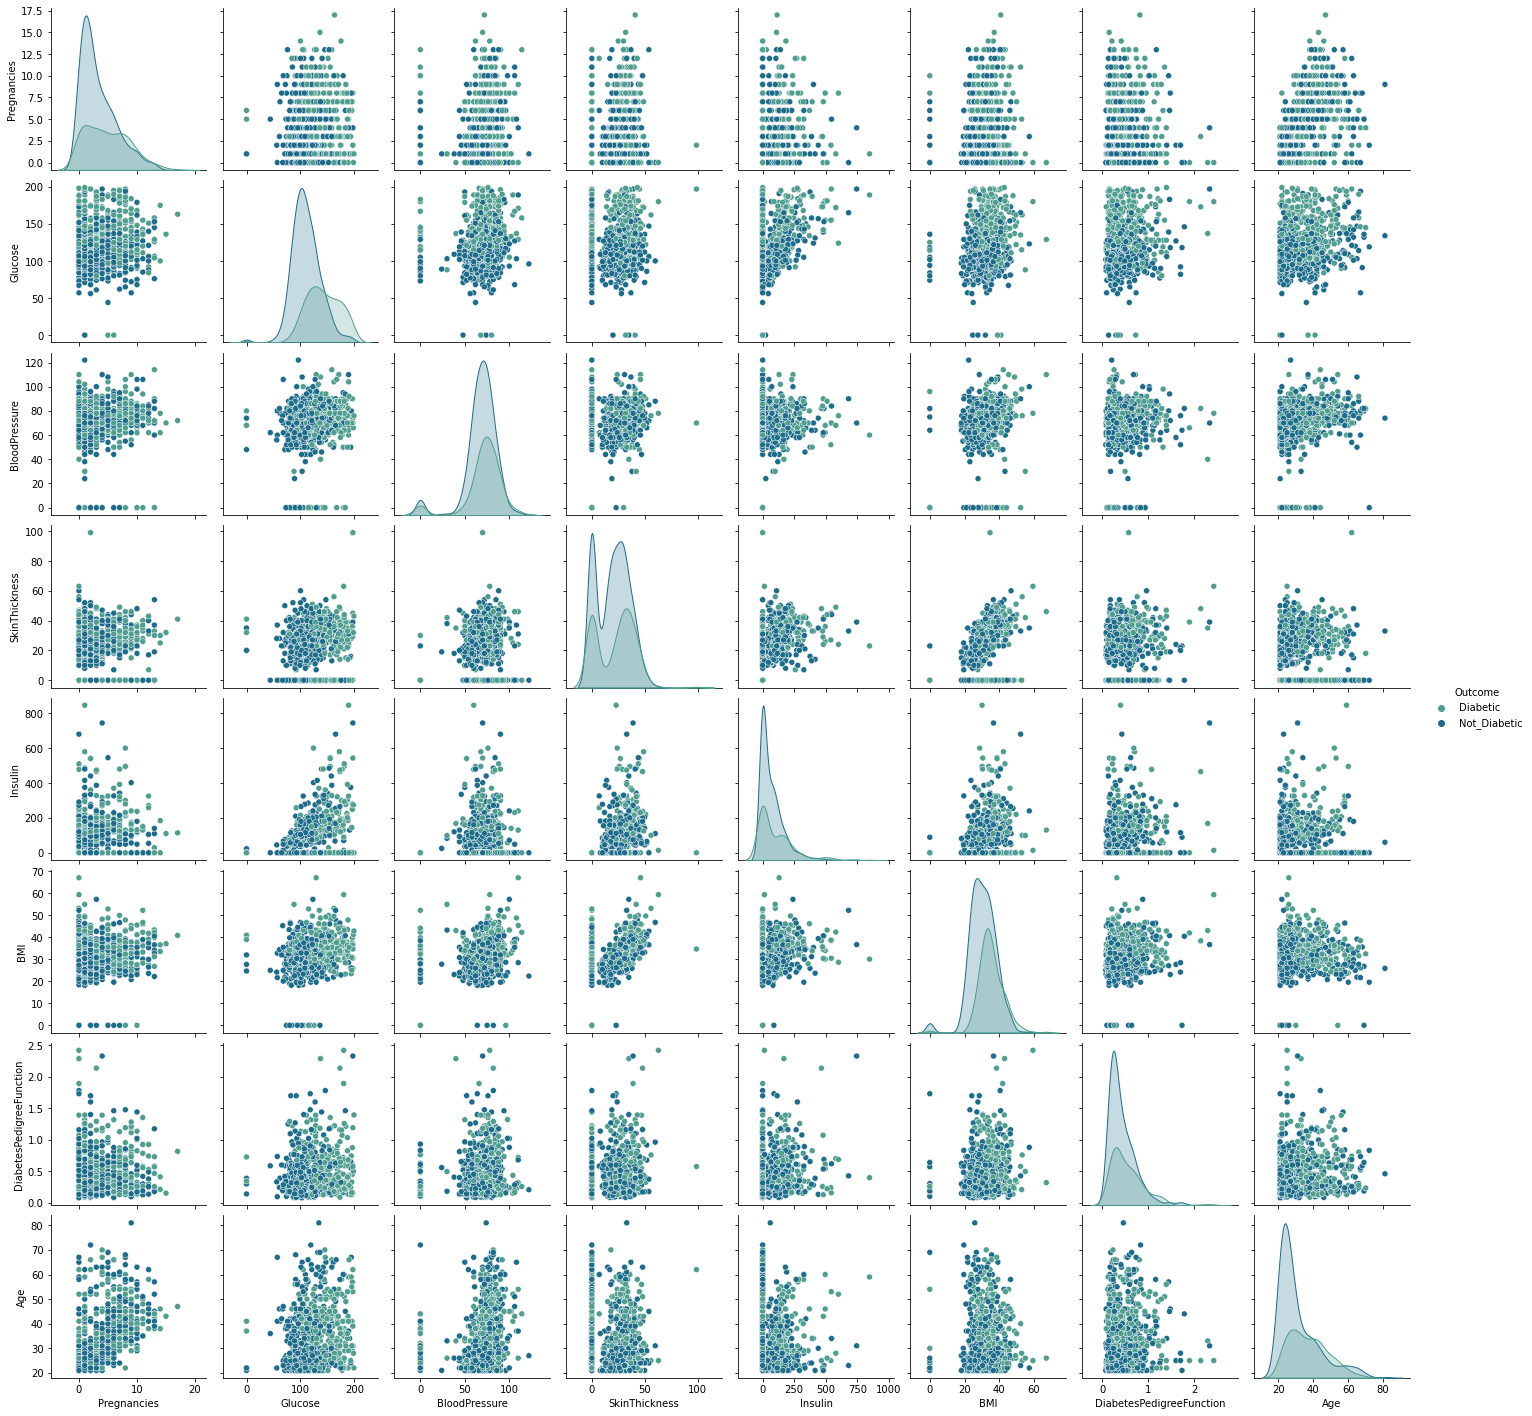

In [17]:
sns.pairplot(df6, hue = 'Outcome', palette='crest', vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
plt.show()


In [18]:
# Grouping patients with and without heart diseases into two dinstinct dataframe for use in visualization below
Outcome1=df6[df6['Outcome']=='Diabetic']
Outcome0=df6[df6['Outcome']=='Not_Diabetic']

**Review of Pregnancies Distribution**

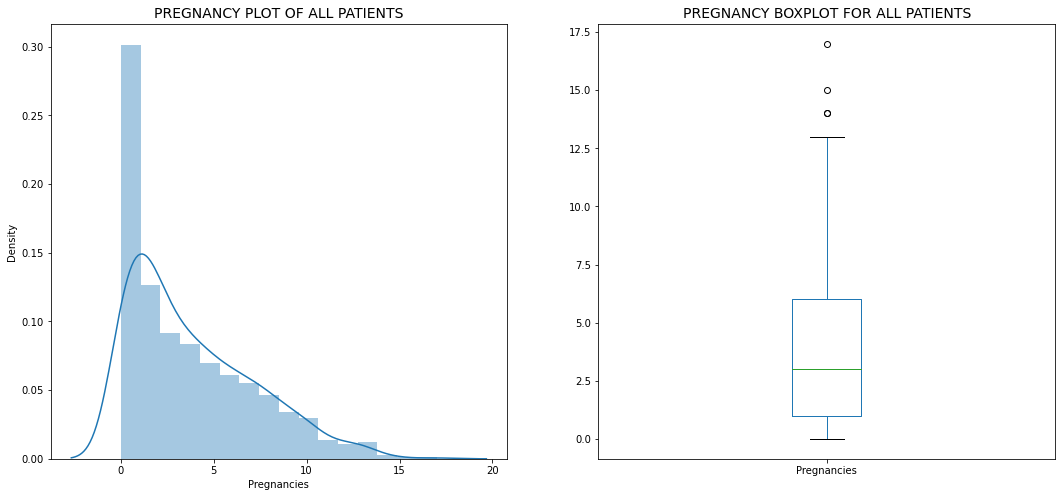

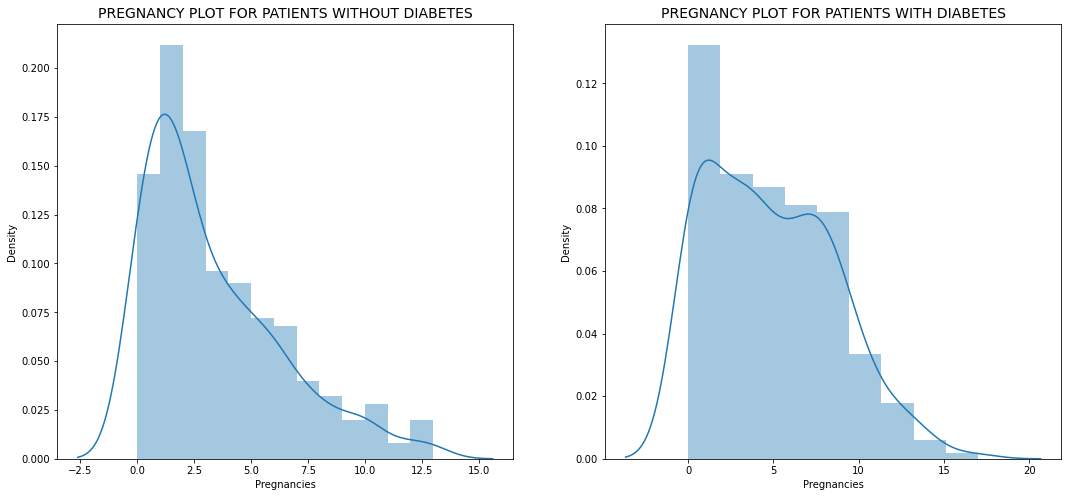

In [19]:
# plotting 'Pregnancies' for the entire distribution, and against patients with and without diabetes

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df6['Pregnancies'])
plt.title('PREGNANCY PLOT OF ALL PATIENTS', fontsize=14, weight='light')

# plotting boxplot for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
df6['Pregnancies'].plot(kind='box', subplots=True, layout=(5,3))
plt.title('PREGNANCY BOXPLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting 'Pregnancies' for patients without heart diabetes
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(Outcome0['Pregnancies'])
plt.title('PREGNANCY PLOT FOR PATIENTS WITHOUT DIABETES', fontsize=14, weight='light')

# plotting 'Pregnancies' for patients with heart diabetes
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(Outcome1['Pregnancies'])
plt.title('PREGNANCY PLOT FOR PATIENTS WITH DIABETES', fontsize=14, weight='light')

plt.show()

**Review of Glucose Distribution**

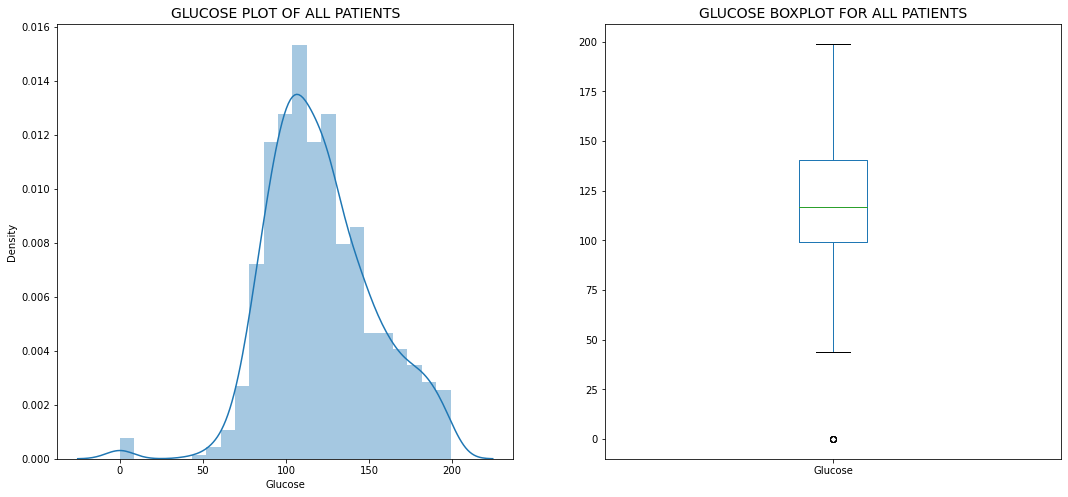

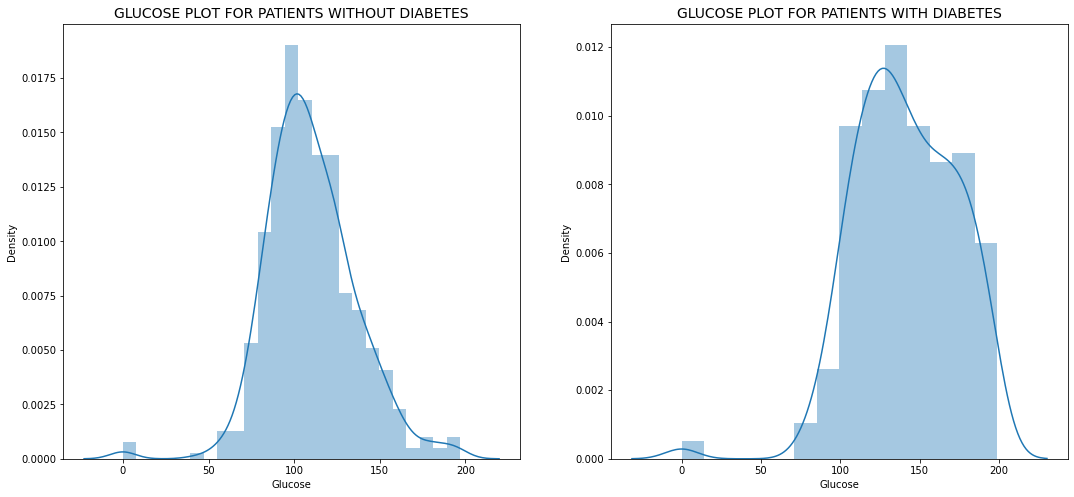

In [20]:
# plotting 'Glucose' for the entire distribution, and against patients with and without diabetes

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df6['Glucose'])
plt.title('GLUCOSE PLOT OF ALL PATIENTS', fontsize=14, weight='light')

# plotting boxplot for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
df6['Glucose'].plot(kind='box', subplots=True, layout=(5,3))
plt.title('GLUCOSE BOXPLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting 'Glucose' for patients without heart diabetes
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(Outcome0['Glucose'])
plt.title('GLUCOSE PLOT FOR PATIENTS WITHOUT DIABETES', fontsize=14, weight='light')

# plotting 'Glucose' for patients with heart diabetes
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(Outcome1['Glucose'])
plt.title('GLUCOSE PLOT FOR PATIENTS WITH DIABETES', fontsize=14, weight='light')

plt.show()

**Review of BloodPressure Distribution**

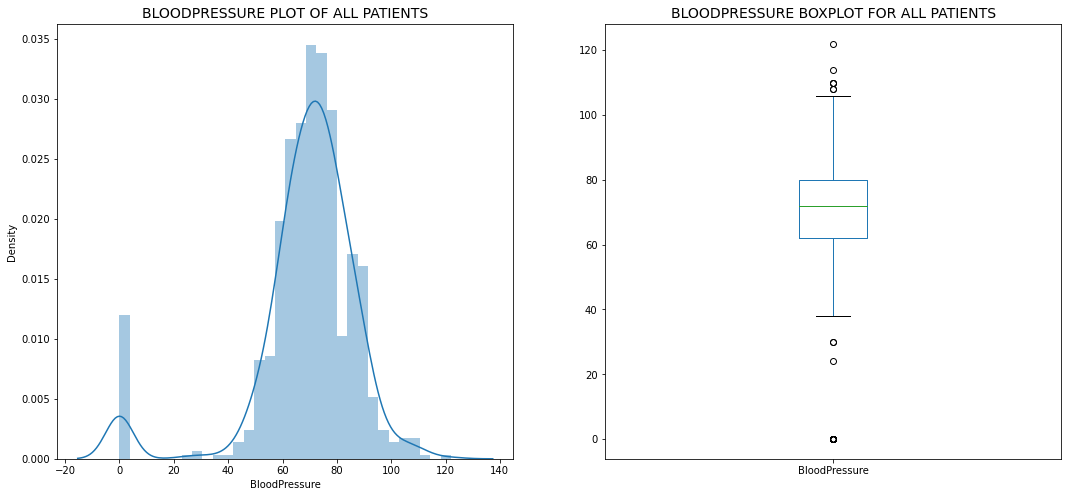

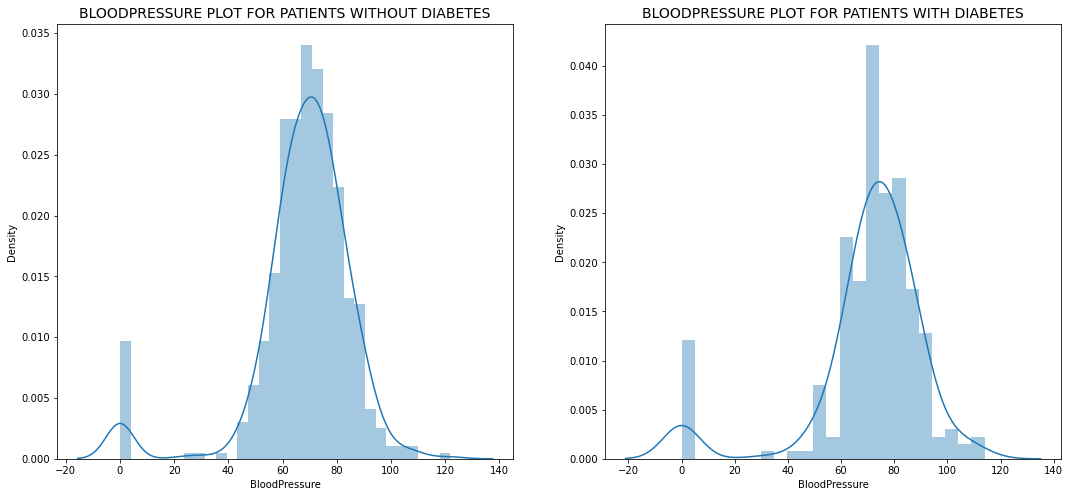

In [21]:
# plotting 'BloodPressure' for the entire distribution, and against patients with and without diabetes

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df6['BloodPressure'])
plt.title('BLOODPRESSURE PLOT OF ALL PATIENTS', fontsize=14, weight='light')

# plotting boxplot for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
df6['BloodPressure'].plot(kind='box', subplots=True, layout=(5,3))
plt.title('BLOODPRESSURE BOXPLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting 'BloodPressure' for patients without heart diabetes
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(Outcome0['BloodPressure'])
plt.title('BLOODPRESSURE PLOT FOR PATIENTS WITHOUT DIABETES', fontsize=14, weight='light')

# plotting 'BloodPressure' for patients with heart diabetes
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(Outcome1['BloodPressure'])
plt.title('BLOODPRESSURE PLOT FOR PATIENTS WITH DIABETES', fontsize=14, weight='light')

plt.show()

**Review of SkinThickness Distribution**

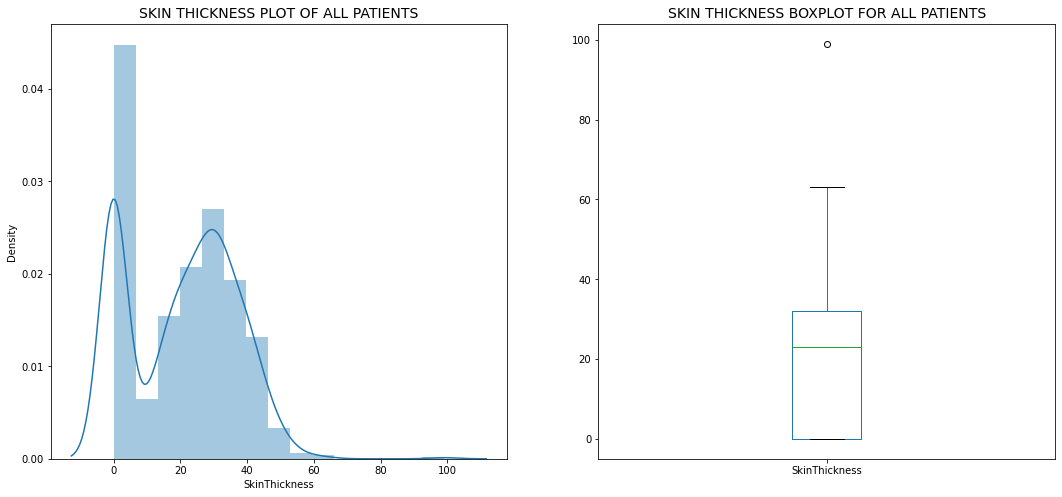

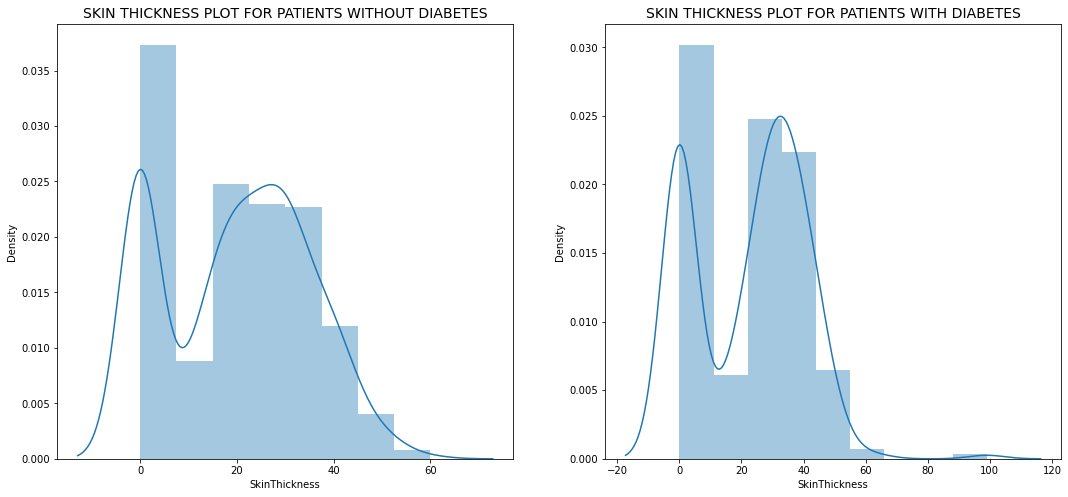

In [22]:
# plotting 'SkinThickness' for the entire distribution, and against patients with and without diabetes

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df6['SkinThickness'])
plt.title('SKIN THICKNESS PLOT OF ALL PATIENTS', fontsize=14, weight='light')

# plotting boxplot for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
df6['SkinThickness'].plot(kind='box', subplots=True, layout=(5,3))
plt.title('SKIN THICKNESS BOXPLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting 'SkinThickness' for patients without heart diabetes
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(Outcome0['SkinThickness'])
plt.title('SKIN THICKNESS PLOT FOR PATIENTS WITHOUT DIABETES', fontsize=14, weight='light')

# plotting 'SkinThickness' for patients with heart diabetes
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(Outcome1['SkinThickness'])
plt.title('SKIN THICKNESS PLOT FOR PATIENTS WITH DIABETES', fontsize=14, weight='light')

plt.show()

**Review of Insulin Distribution**

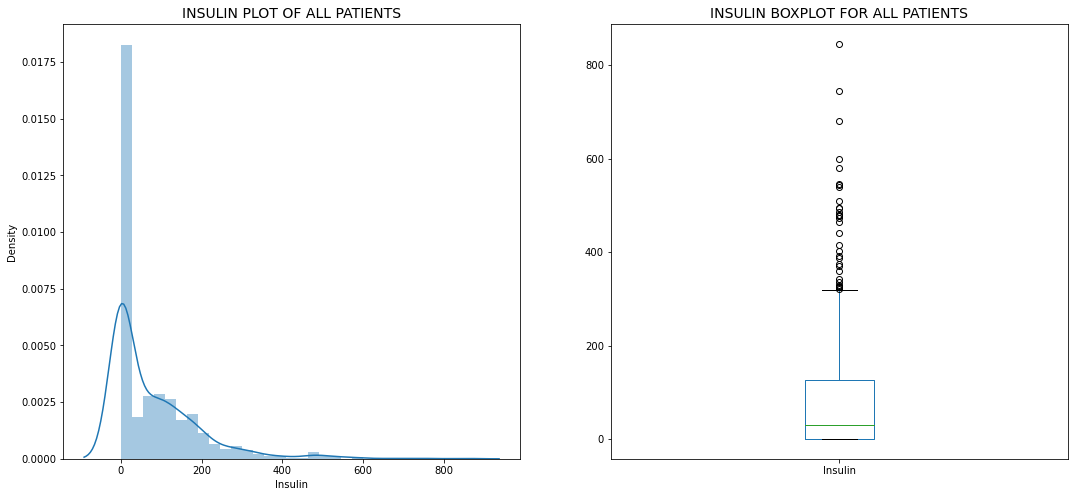

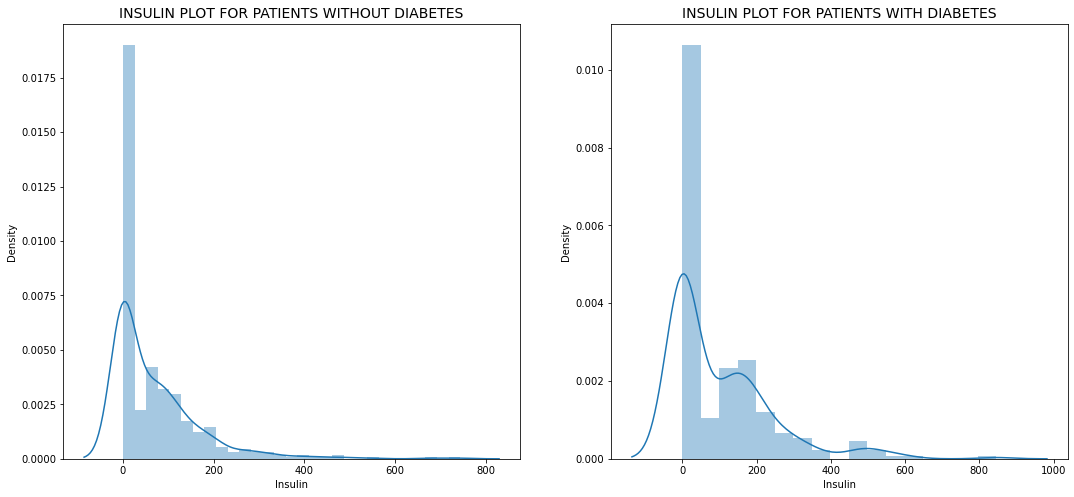

In [23]:
# plotting 'Insulin' for the entire distribution, and against patients with and without diabetes

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df6['Insulin'])
plt.title('INSULIN PLOT OF ALL PATIENTS', fontsize=14, weight='light')

# plotting boxplot for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
df6['Insulin'].plot(kind='box', subplots=True, layout=(5,3))
plt.title('INSULIN BOXPLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting 'Insulin' for patients without heart diabetes
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(Outcome0['Insulin'])
plt.title('INSULIN PLOT FOR PATIENTS WITHOUT DIABETES', fontsize=14, weight='light')

# plotting 'Insulin' for patients with heart diabetes
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(Outcome1['Insulin'])
plt.title('INSULIN PLOT FOR PATIENTS WITH DIABETES', fontsize=14, weight='light')

plt.show()

**Review of BMI Distribution**

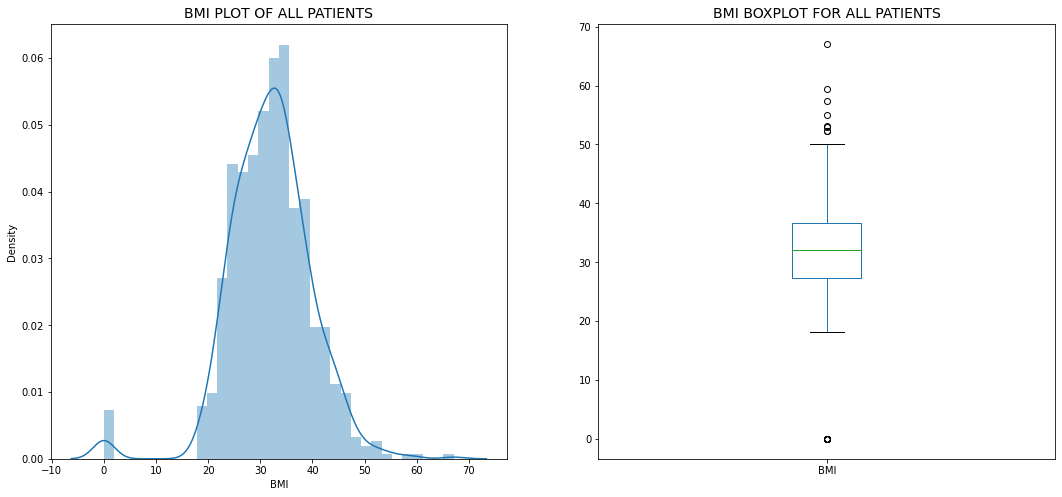

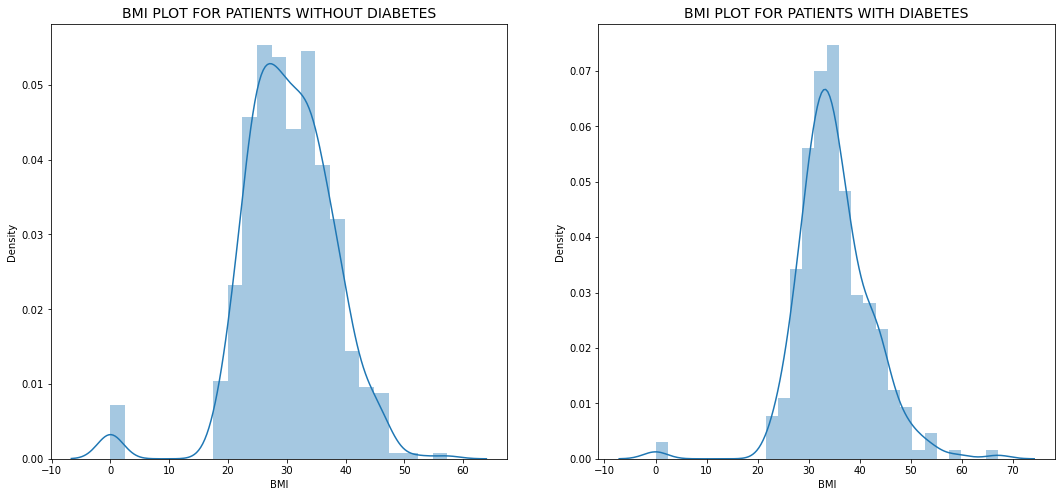

In [24]:
# plotting 'BMI' for the entire distribution, and against patients with and without diabetes

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df6['BMI'])
plt.title('BMI PLOT OF ALL PATIENTS', fontsize=14, weight='light')

# plotting boxplot for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
df6['BMI'].plot(kind='box', subplots=True, layout=(5,3))
plt.title('BMI BOXPLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting 'BMI' for patients without heart diabetes
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(Outcome0['BMI'])
plt.title('BMI PLOT FOR PATIENTS WITHOUT DIABETES', fontsize=14, weight='light')

# plotting 'BMI' for patients with heart diabetes
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(Outcome1['BMI'])
plt.title('BMI PLOT FOR PATIENTS WITH DIABETES', fontsize=14, weight='light')

plt.show()

**Review of DiabetesPedigreeFunction Distribution**

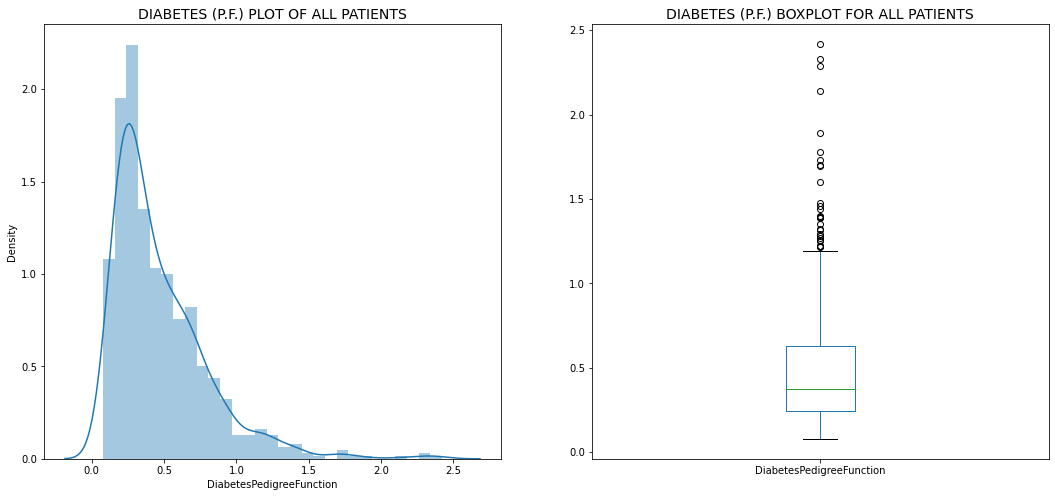

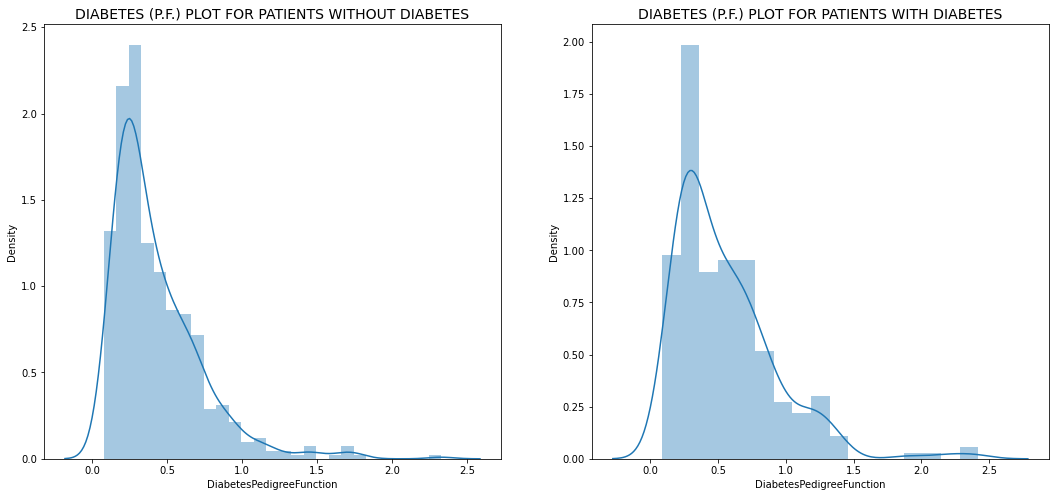

In [25]:
# plotting 'DiabetesPedigreeFunction' for the entire distribution, and against patients with and without diabetes

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df6['DiabetesPedigreeFunction'])
plt.title('DIABETES (P.F.) PLOT OF ALL PATIENTS', fontsize=14, weight='light')

# plotting boxplot for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
df6['DiabetesPedigreeFunction'].plot(kind='box', subplots=True, layout=(5,3))
plt.title('DIABETES (P.F.) BOXPLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting 'DiabetesPedigreeFunction' for patients without heart diabetes
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(Outcome0['DiabetesPedigreeFunction'])
plt.title('DIABETES (P.F.) PLOT FOR PATIENTS WITHOUT DIABETES', fontsize=14, weight='light')

# plotting 'DiabetesPedigreeFunction' for patients with heart diabetes
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(Outcome1['DiabetesPedigreeFunction'])
plt.title('DIABETES (P.F.) PLOT FOR PATIENTS WITH DIABETES', fontsize=14, weight='light')

plt.show()

**Review of Age Distribution**

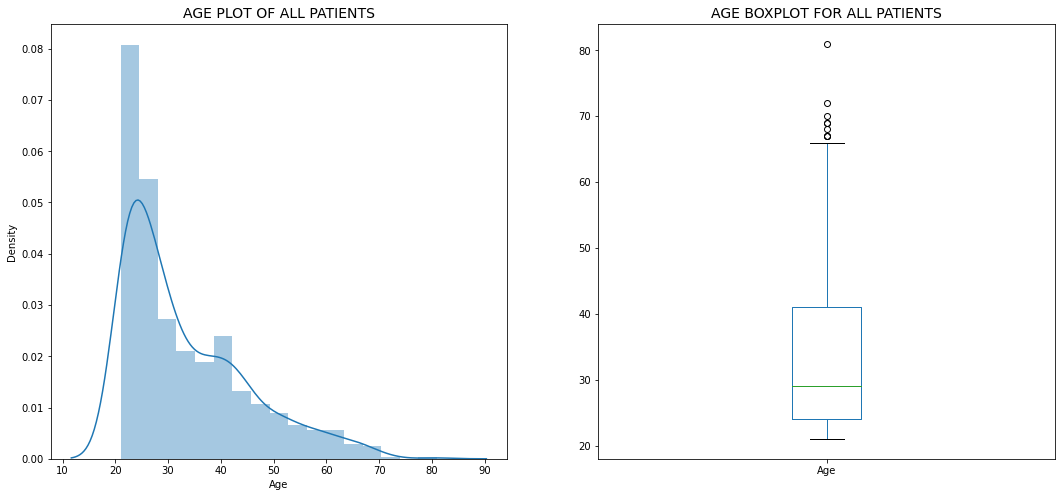

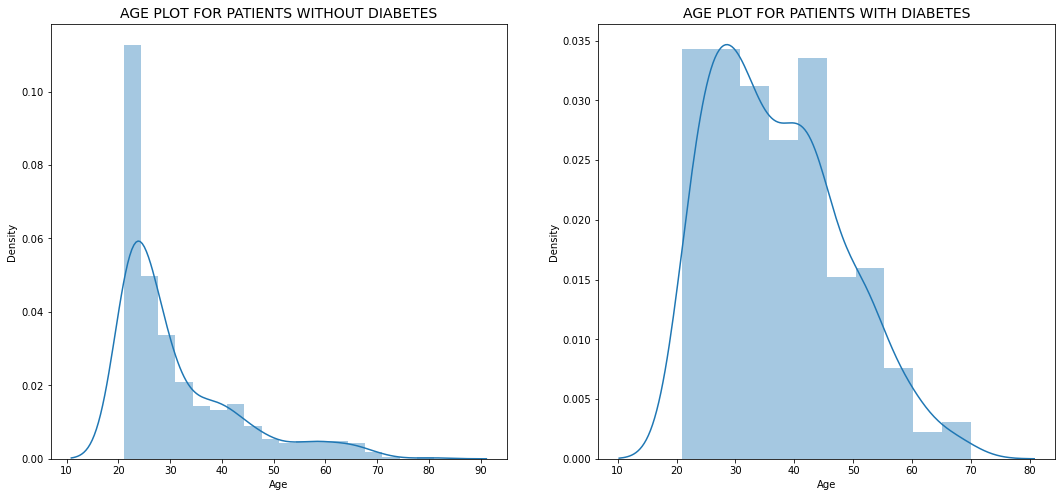

In [26]:
# plotting 'Age' for the entire distribution, and against patients with and without diabetes

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df6['Age'])
plt.title('AGE PLOT OF ALL PATIENTS', fontsize=14, weight='light')

# plotting boxplot for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
df6['Age'].plot(kind='box', subplots=True, layout=(5,3))
plt.title('AGE BOXPLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting 'Age' for patients without heart diabetes
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(Outcome0['Age'])
plt.title('AGE PLOT FOR PATIENTS WITHOUT DIABETES', fontsize=14, weight='light')

# plotting 'Age' for patients with heart diabetes
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(Outcome1['Age'])
plt.title('AGE PLOT FOR PATIENTS WITH DIABETES', fontsize=14, weight='light')

plt.show()

# Machine Learning Part B

In [27]:
# Python libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# ML algorithms & cross validation libraries
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
import xgboost as xgb

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

# Python libraries for machine learning evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve,auc
from sklearn.metrics import matthews_corrcoef,fbeta_score,log_loss,precision_score,f1_score,recall_score
from sklearn import metrics

from scipy import stats


Preparing the data for Model 

Feature Normalization

In [28]:
# Converting categorical attributes to 1 & 0 for ML modelling

df6['Outcome'][df6['Outcome'] == 'Not_Diabetic'] = 0
df6['Outcome'][df6['Outcome'] == 'Diabetic'] = 1

df6['Outcome'] = df6['Outcome'].astype(np.int64)

df6.head(2)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0

In [29]:
# checking shape of dataset after outlier removal
df6.shape

(768, 9)

In [30]:
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
df6[columns_to_scale] = StandardScaler.fit_transform(df6[columns_to_scale])

In [31]:
df6.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.468492  1.425995        1  
1                 -0.365061 -0.190672        0  
2                  0.604397 -0.105584        1  
3                 -0.920763 -1.041549        0  
4                  5.484909 -0.020496        1

In [32]:
#seperating 'Outcome' variable from other features
X6 = df6.drop(['Outcome'], axis=1) 
y6 = df6['Outcome']

In [33]:
X6.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496

In [34]:
y6.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

REchecking Correlation

<AxesSubplot:title={'center':'Correlation with Outcome'}>

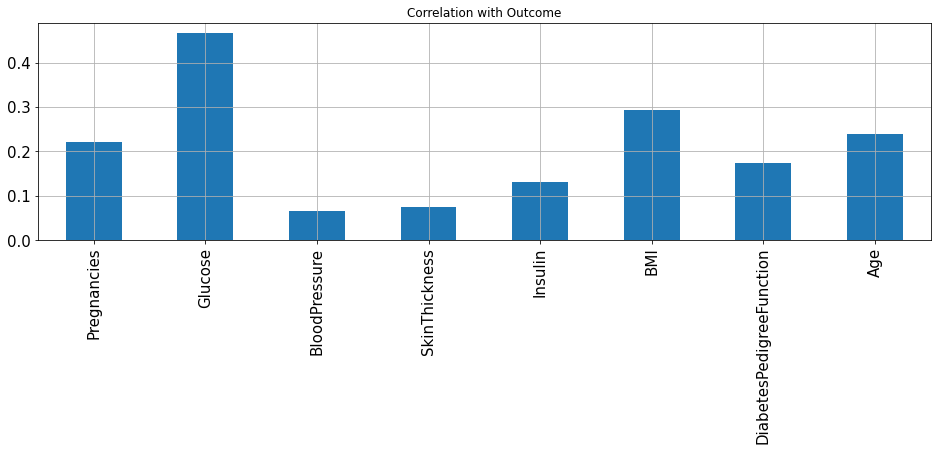

In [35]:
#Correlation with Response Variable class

X6.corrwith(y6).plot.bar(
        figsize = (16, 4), title = "Correlation with Outcome", fontsize = 15,
        rot = 90, grid = True)


In [36]:
X_train6, X_test6,y_train6, y_test6=train_test_split(X6,y6,test_size=0.3,random_state=40)

In [37]:
## checking distribution of Outcome variable in train test split
print(' ')
print('*****************************************************')
print("------'X6' & 'y6' Test & Train Sizes-------------------")
print('*****************************************************')
print('X_train6 Size = ', X_train6.size, '::::: X_test6 Size = ',X_test6.size)
print('y_train6 Size = ', y_train6.size, ' ::::: y_test6 Size = ', y_test6.size)

print(' ')

print('*****************************************************')
print('*****************************************************')

print('Distribution of Outcome variable in training set')
print(y_train6.value_counts())

print('Distribution of Outcome variable in test set')
print(y_test6.value_counts())

 
*****************************************************
------'X6' & 'y6' Test & Train Sizes-------------------
*****************************************************
X_train6 Size =  4296 ::::: X_test6 Size =  1848
y_train6 Size =  537  ::::: y_test6 Size =  231
 
*****************************************************
*****************************************************
Distribution of Outcome variable in training set
0    358
1    179
Name: Outcome, dtype: int64
Distribution of Outcome variable in test set
0    142
1     89
Name: Outcome, dtype: int64


In [38]:
print('*****************************************************')

print('Shape of "Training Set6" X_train and Y_train')
print('X_train6 = ', X_train6.shape, ' ::::: y_train6 = ', y_train6.shape)
print(' ')
print('*****************************************************')
print('*****************************************************')

print('Shape of "Test Sets6" X_test6 and Y_test6')
print('X_test6  =  ', X_test6.shape, ' ::::: y_test6 = ', y_test6.shape)
print(' ')
print('*****************************************************')

*****************************************************
Shape of "Training Set6" X_train and Y_train
X_train6 =  (537, 8)  ::::: y_train6 =  (537,)
 
*****************************************************
*****************************************************
Shape of "Test Sets6" X_test6 and Y_test6
X_test6  =   (231, 8)  ::::: y_test6 =  (231,)
 
*****************************************************


# Cross Validation of Models

In [39]:
import xgboost as xgb
# function initializing baseline machine learning models
def GetBasedModel6():
    basedModels = []
    basedModels.append(('LR_L2'   , LogisticRegression(penalty='l2')))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN7'  , KNeighborsClassifier(7)))
    basedModels.append(('KNN5'  , KNeighborsClassifier(5)))
    basedModels.append(('KNN9'  , KNeighborsClassifier(9)))
    basedModels.append(('KNN11'  , KNeighborsClassifier(11)))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM Linear'  , SVC(kernel='linear',gamma='auto',probability=True)))
    basedModels.append(('SVM RBF'  , SVC(kernel='rbf',gamma='auto',probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100)))
    basedModels.append(('ET500'   , ExtraTreesClassifier(n_estimators= 500)))
    basedModels.append(('MLP', MLPClassifier()))
    basedModels.append(('SGD3000', SGDClassifier(max_iter=1000, tol=1e-4)))
    basedModels.append(('XGB_2000', xgb.XGBClassifier(n_estimators= 2000, eval_metric='mlogloss')))
    basedModels.append(('XGB_500', xgb.XGBClassifier(n_estimators= 500, eval_metric='mlogloss')))
    basedModels.append(('XGB_100', xgb.XGBClassifier(n_estimators= 100, eval_metric='mlogloss')))
    basedModels.append(('XGB_1000', xgb.XGBClassifier(n_estimators= 1000, eval_metric='mlogloss')))
    basedModels.append(('ET1000'   , ExtraTreesClassifier(n_estimators= 1000)))
    
    return basedModels

In [40]:
# function for performing 10-fold cross validation of all the baseline models
def BasedLine6(X_train6, y_train6,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train6, y_train6, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
         
        
    return results,msg

In [41]:
models = GetBasedModel6()
names,results = BasedLine6(X_train6, y_train6,models)

LR_L2: 0.780224 (0.043237)
LDA: 0.780294 (0.046667)
KNN7: 0.748777 (0.055046)
KNN5: 0.752551 (0.058970)
KNN9: 0.752376 (0.049488)
KNN11: 0.744934 (0.048740)
CART: 0.672432 (0.054702)
NB: 0.763347 (0.045677)
SVM Linear: 0.767191 (0.043444)
SVM RBF: 0.765409 (0.040474)
AB: 0.761670 (0.040347)
GBM: 0.756184 (0.026970)
RF_Ent100: 0.759818 (0.058745)
RF_Gini100: 0.748672 (0.059469)
ET100: 0.763557 (0.049776)
ET500: 0.765339 (0.050825)
MLP: 0.761635 (0.038681)
SGD3000: 0.711286 (0.076831)
XGB_2000: 0.733753 (0.048036)
XGB_500: 0.728197 (0.050756)
XGB_100: 0.733788 (0.049992)
XGB_1000: 0.726275 (0.045993)
ET1000: 0.761635 (0.049079)


# MODELS

# Logistics Regression

In [42]:
Lreg6 = LogisticRegression()
Lreg6.fit(X_train6, y_train6)
y_pred_Lreg6 = Lreg6.predict(X_test6)

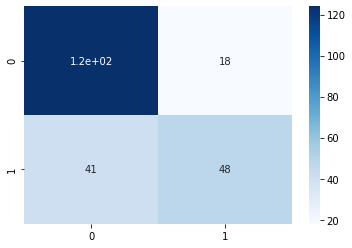

In [43]:
cm=confusion_matrix(y_test6,y_pred_Lreg6)
sns.heatmap(cm, annot=True,cmap='Blues')
#sns.heatmap(cm, annot=True,cmap='Blues', figsize=(18,6))
plt.show()

In [44]:
accuracy_score(y_test6,y_pred_Lreg6)

0.7445887445887446

In [45]:
print(classification_report(y_test6, y_pred_Lreg6))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       142
           1       0.73      0.54      0.62        89

    accuracy                           0.74       231
   macro avg       0.74      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



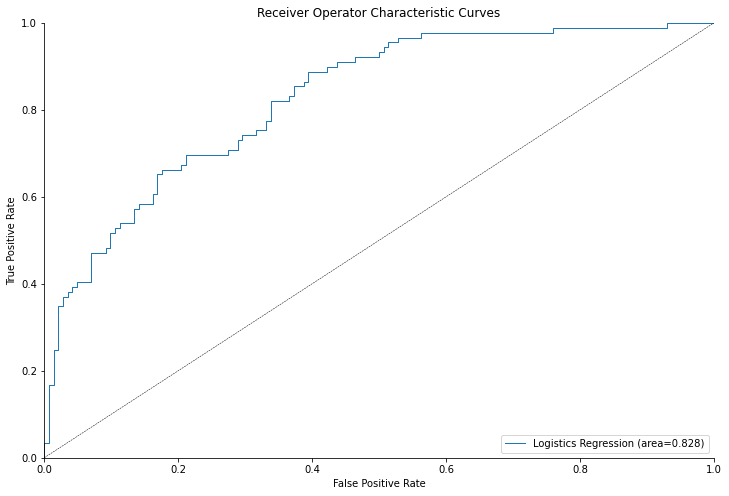

In [46]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test6,Lreg6.predict_proba(X_test6),label='Logistics Regression',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curves')
sns.despine()

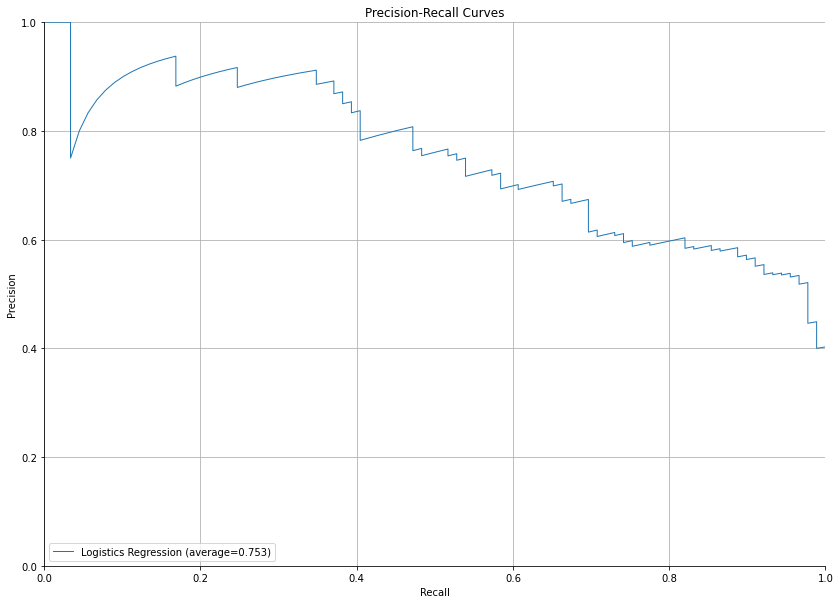

In [47]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test6,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test6, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test6,Lreg6.predict_proba(X_test6),label='Logistics Regression',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curves')
sns.despine()

# Random Forest Classifier (criterion = 'entropy')

In [48]:
rf_ent6 = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent6.fit(X_train6, y_train6)
y_pred_rfe6 = rf_ent6.predict(X_test6)

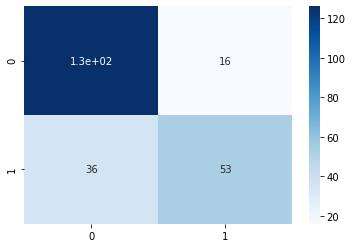

In [49]:
cm=confusion_matrix(y_test6,y_pred_rfe6)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [50]:
accuracy_score(y_test6,y_pred_rfe6)

0.7748917748917749

In [51]:
print(classification_report(y_test6, y_pred_rfe6))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       142
           1       0.77      0.60      0.67        89

    accuracy                           0.77       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



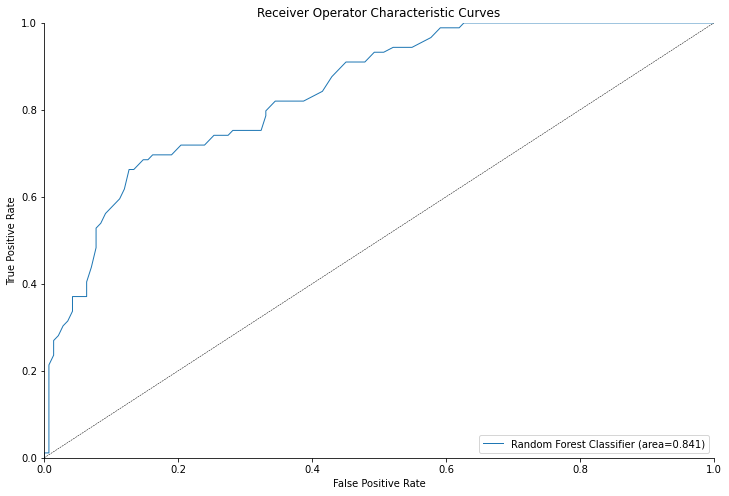

In [52]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test6,rf_ent6.predict_proba(X_test6),label='Random Forest Classifier',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curves')
sns.despine()

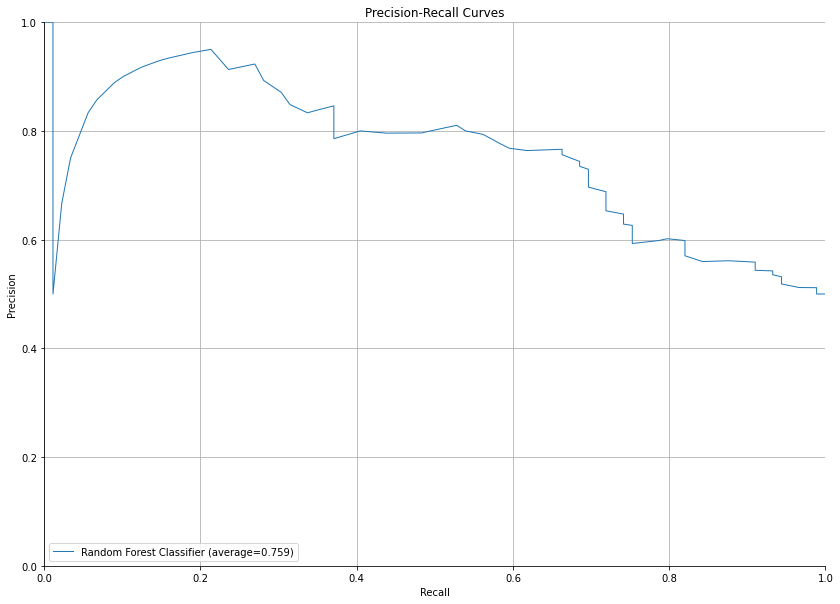

In [53]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test6,rf_ent6.predict_proba(X_test6),label='Random Forest Classifier',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curves')
sns.despine()

# Multi Layer Perceptron

In [54]:
mlp6 = MLPClassifier()
mlp6.fit(X_train6,y_train6)
y_pred_mlp6 = mlp6.predict(X_test6)

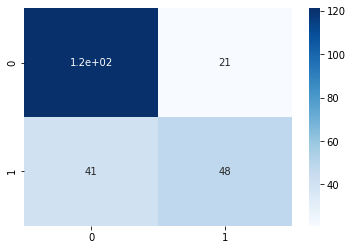

In [55]:
cm=confusion_matrix(y_test6,y_pred_mlp6)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [56]:
accuracy_score(y_test6,y_pred_mlp6)

0.7316017316017316

In [57]:
print(classification_report(y_test6, y_pred_mlp6))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       142
           1       0.70      0.54      0.61        89

    accuracy                           0.73       231
   macro avg       0.72      0.70      0.70       231
weighted avg       0.73      0.73      0.72       231



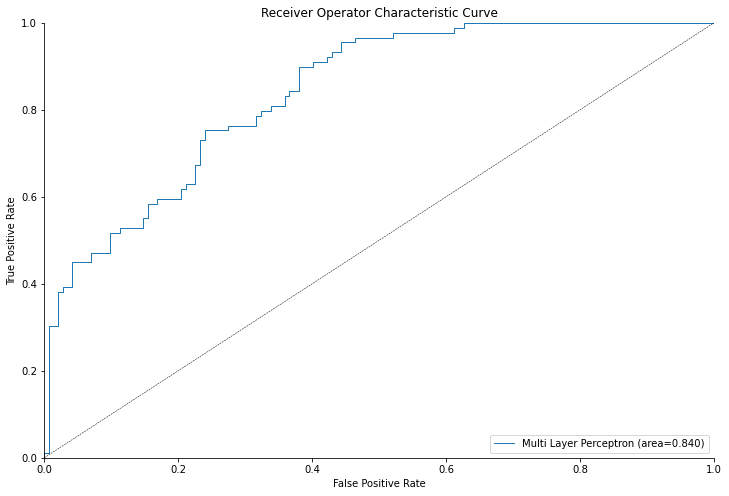

In [58]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test6,mlp6.predict_proba(X_test6),label='Multi Layer Perceptron',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

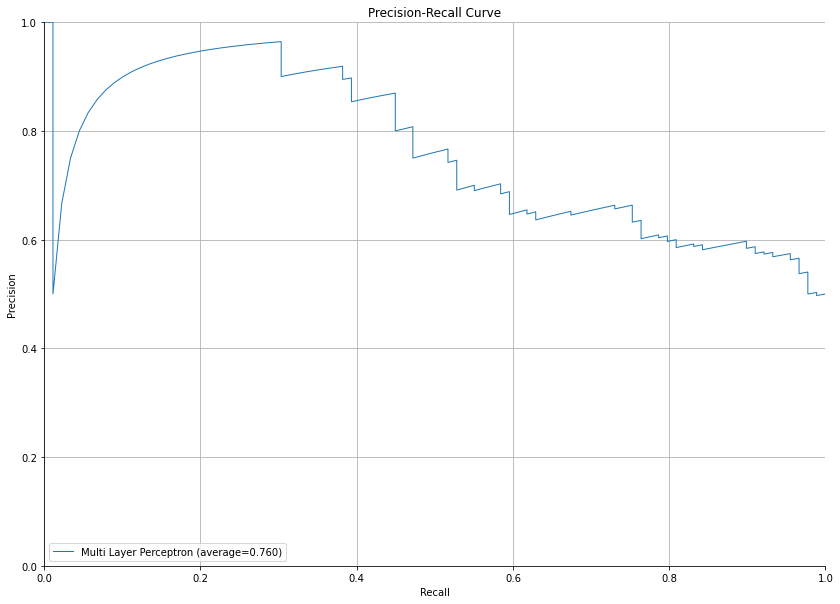

In [59]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test6,mlp6.predict_proba(X_test6),label='Multi Layer Perceptron',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# K' Nearest Neighbour (n=9)

In [60]:
knn6 = KNeighborsClassifier(9)
knn6.fit(X_train6,y_train6)
y_pred_knn6 = knn6.predict(X_test6)

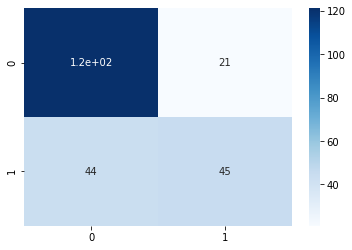

In [61]:
cm=confusion_matrix(y_test6,y_pred_knn6)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [62]:
accuracy_score(y_test6,y_pred_knn6)

0.7186147186147186

In [63]:
print(classification_report(y_test6, y_pred_knn6))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79       142
           1       0.68      0.51      0.58        89

    accuracy                           0.72       231
   macro avg       0.71      0.68      0.68       231
weighted avg       0.71      0.72      0.71       231



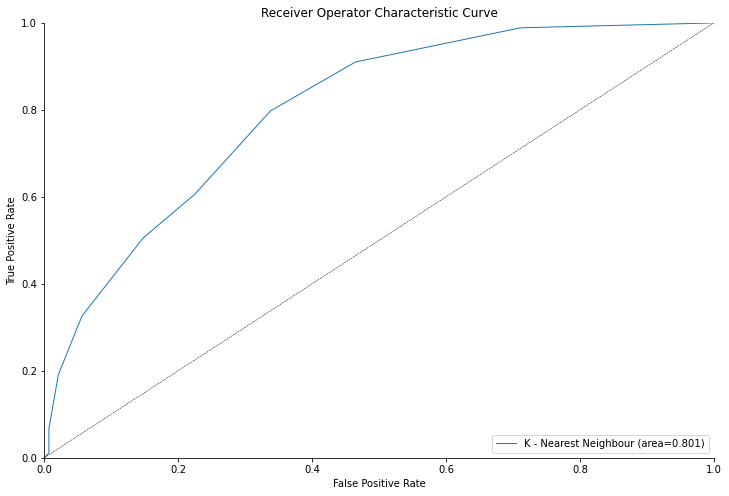

In [64]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test6,knn6.predict_proba(X_test6),label='K - Nearest Neighbour',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

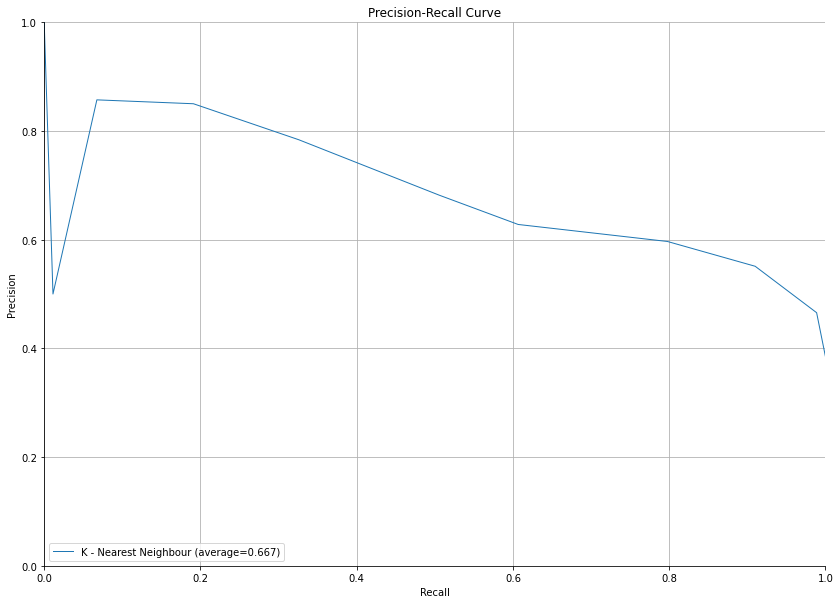

In [65]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test6,knn6.predict_proba(X_test6),label='K - Nearest Neighbour',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Extra Tree Classifier (n_estimators=500)

In [66]:
et_100_6 = ExtraTreesClassifier(n_estimators= 100)
et_100_6.fit(X_train6,y_train6)
y_pred_et_100_6 = et_100_6.predict(X_test6)

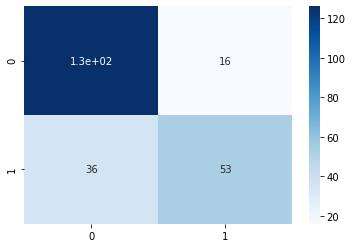

In [67]:
cm=confusion_matrix(y_test6,y_pred_et_100_6)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [68]:
accuracy_score(y_test6,y_pred_et_100_6)

0.7748917748917749

In [69]:
print(classification_report(y_test6, y_pred_et_100_6))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       142
           1       0.77      0.60      0.67        89

    accuracy                           0.77       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



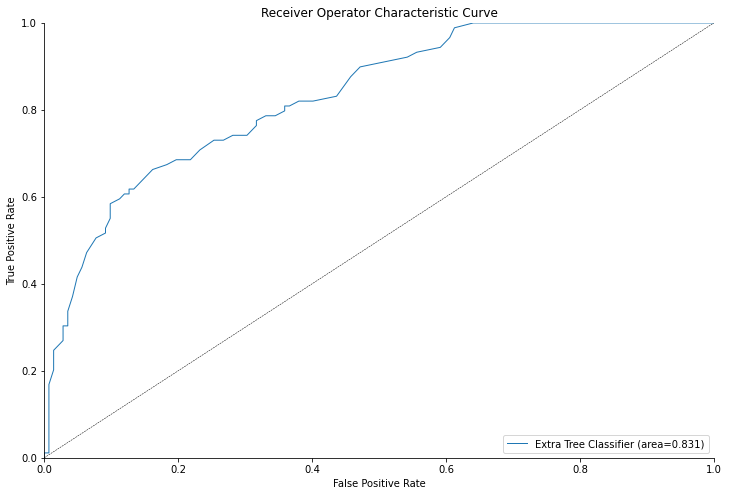

In [70]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test6,et_100_6.predict_proba(X_test6),label='Extra Tree Classifier',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

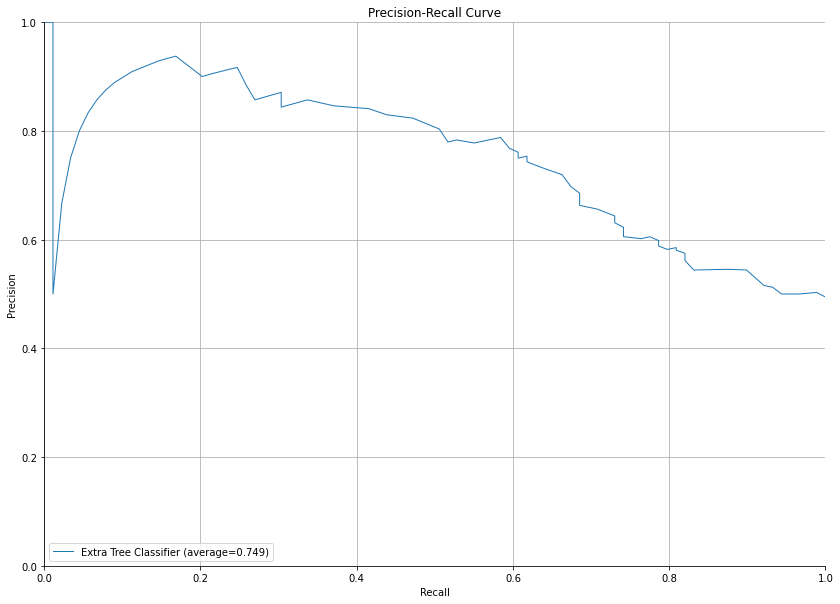

In [71]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test6,et_100_6.predict_proba(X_test6),label='Extra Tree Classifier',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# XGBoost (n_estimators=500)

In [72]:
import xgboost as xgb
xgb6 = xgb.XGBClassifier(n_estimators= 500, eval_metric='mlogloss')
xgb6.fit(X_train6,y_train6)
y_pred_xgb6 = xgb6.predict(X_test6)

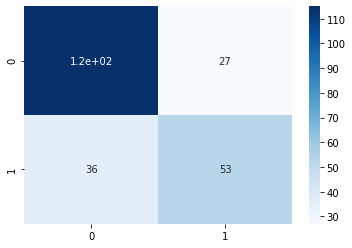

In [73]:
cm=confusion_matrix(y_test6,y_pred_xgb6)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [74]:
accuracy_score(y_test6,y_pred_xgb6)

0.7272727272727273

In [75]:
print(classification_report(y_test6, y_pred_xgb6))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       142
           1       0.66      0.60      0.63        89

    accuracy                           0.73       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.72      0.73      0.72       231



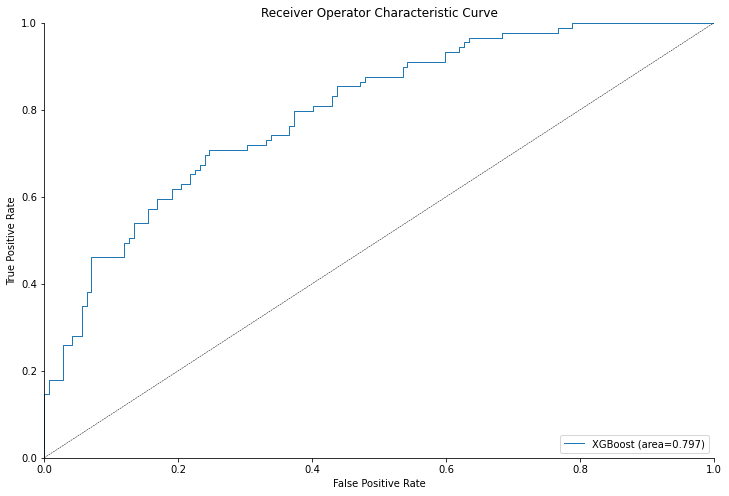

In [76]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test6,xgb6.predict_proba(X_test6),label='XGBoost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

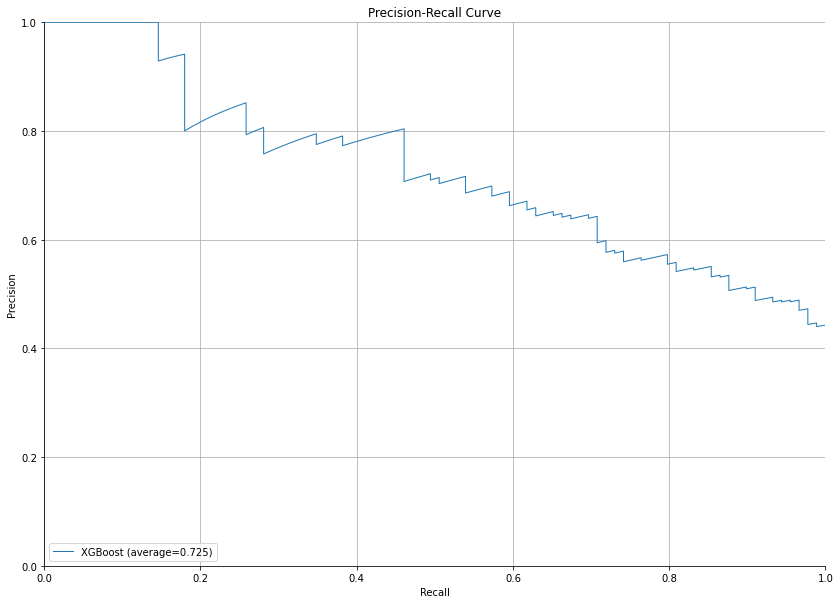

In [77]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test6,xgb6.predict_proba(X_test6),label='XGBoost',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Support Vector Classifier (kernel='linear')

In [78]:
svc6 = SVC(kernel='linear',gamma='auto',probability=True)
svc6.fit(X_train6,y_train6)
y_pred_svc6 = svc6.predict(X_test6)

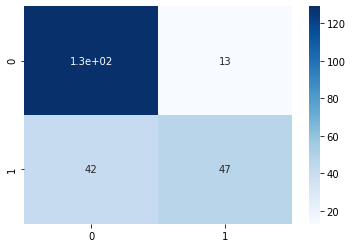

In [79]:
cm=confusion_matrix(y_test6,y_pred_svc6)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [80]:
accuracy_score(y_test6,y_pred_svc6)

0.7619047619047619

In [81]:
print(classification_report(y_test6, y_pred_svc6))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       142
           1       0.78      0.53      0.63        89

    accuracy                           0.76       231
   macro avg       0.77      0.72      0.73       231
weighted avg       0.77      0.76      0.75       231



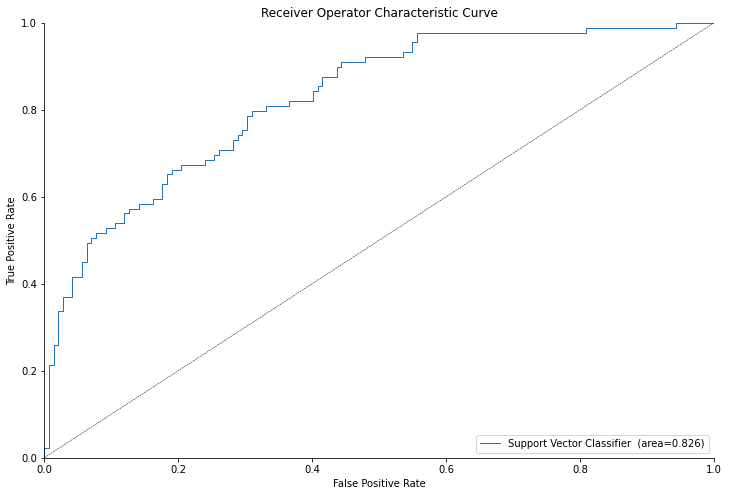

In [82]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test6,svc6.predict_proba(X_test6),label='Support Vector Classifier ',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

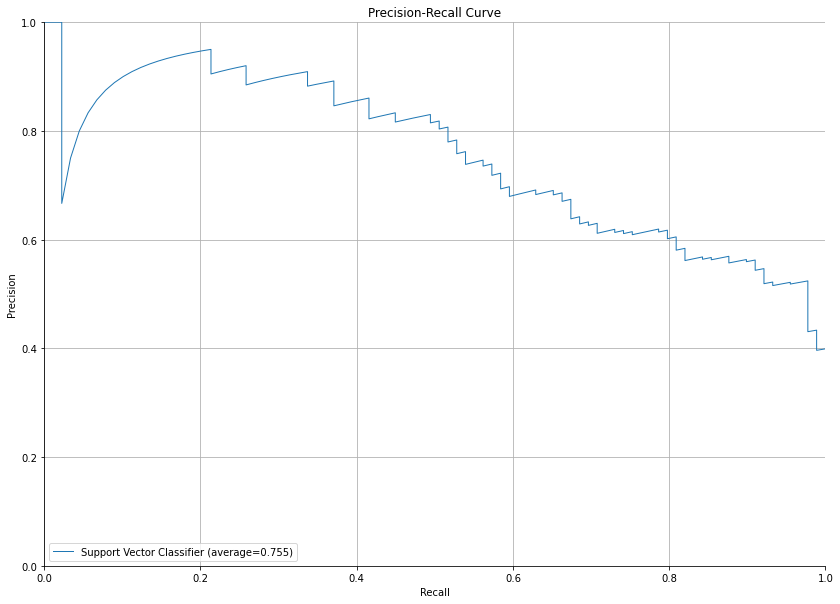

In [83]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test6,svc6.predict_proba(X_test6),label='Support Vector Classifier',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Stochastic Gradient Descent

In [84]:
sgd6 = SGDClassifier(max_iter=1000, tol=1e-4)
sgd6.fit(X_train6,y_train6)
y_pred_sgd6 = sgd6.predict(X_test6)

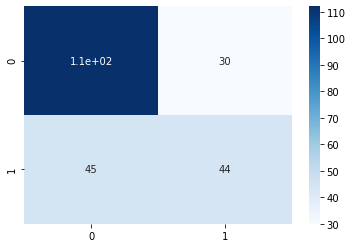

In [85]:
cm=confusion_matrix(y_test6,y_pred_sgd6)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [86]:
accuracy_score(y_test6,y_pred_sgd6)

0.6753246753246753

In [87]:
print(classification_report(y_test6, y_pred_sgd6))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       142
           1       0.59      0.49      0.54        89

    accuracy                           0.68       231
   macro avg       0.65      0.64      0.64       231
weighted avg       0.67      0.68      0.67       231



In [88]:
# f, ax = plt.subplots(figsize=(12,8))

# roc_auc_plot(y_test6,sgd6.predict_proba(X_test6),label='Stochastic Gradient Descent',l='-')

# ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
#         )    
# ax.legend(loc="lower right")    
# ax.set_xlabel('False Positive Rate')
# ax.set_ylabel('True Positive Rate')
# ax.set_xlim([0, 1])
# ax.set_ylim([0, 1])
# ax.set_title('Receiver Operator Characteristic Curve')
# sns.despine()

In [89]:
# f, ax = plt.subplots(figsize=(14,10))

# precision_recall_plot(y_test6,sgd6.predict_proba(X_test6),label='Stochastic Gradient Descent',l='-')
# ax.set_xlabel('Recall')
# ax.set_ylabel('Precision')
# ax.legend(loc="lower left")
# ax.grid(True)
# ax.set_xlim([0, 1])
# ax.set_ylim([0, 1])
# ax.set_title('Precision-Recall Curve')
# sns.despine()

# Adaboost Classifier

In [90]:
ada6 = AdaBoostClassifier()
ada6.fit(X_train6,y_train6)
y_pred_ada6 = ada6.predict(X_test6)

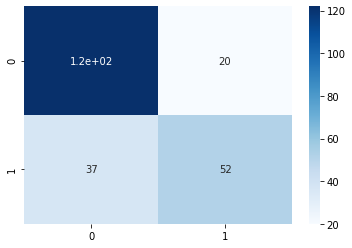

In [91]:
cm=confusion_matrix(y_test6,y_pred_ada6)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [92]:
accuracy_score(y_test6,y_pred_ada6)

0.7532467532467533

In [93]:
print(classification_report(y_test6, y_pred_ada6))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       142
           1       0.72      0.58      0.65        89

    accuracy                           0.75       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.75      0.75      0.75       231



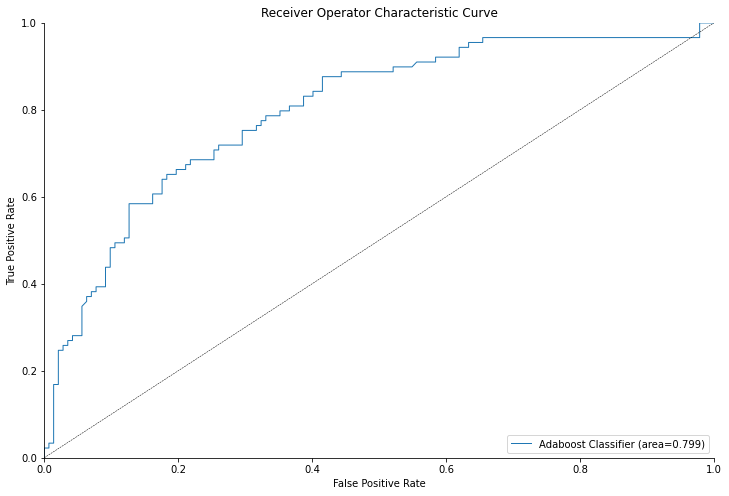

In [94]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test6,ada6.predict_proba(X_test6),label='Adaboost Classifier',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

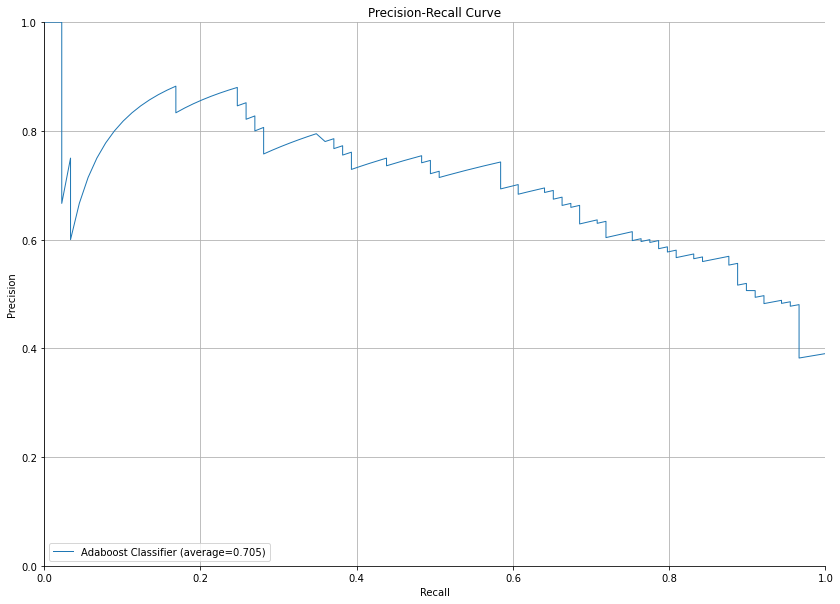

In [95]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test6,ada6.predict_proba(X_test6),label='Adaboost Classifier',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Decision Tree Classifier (CART)

In [96]:
#Visualizing the tree
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

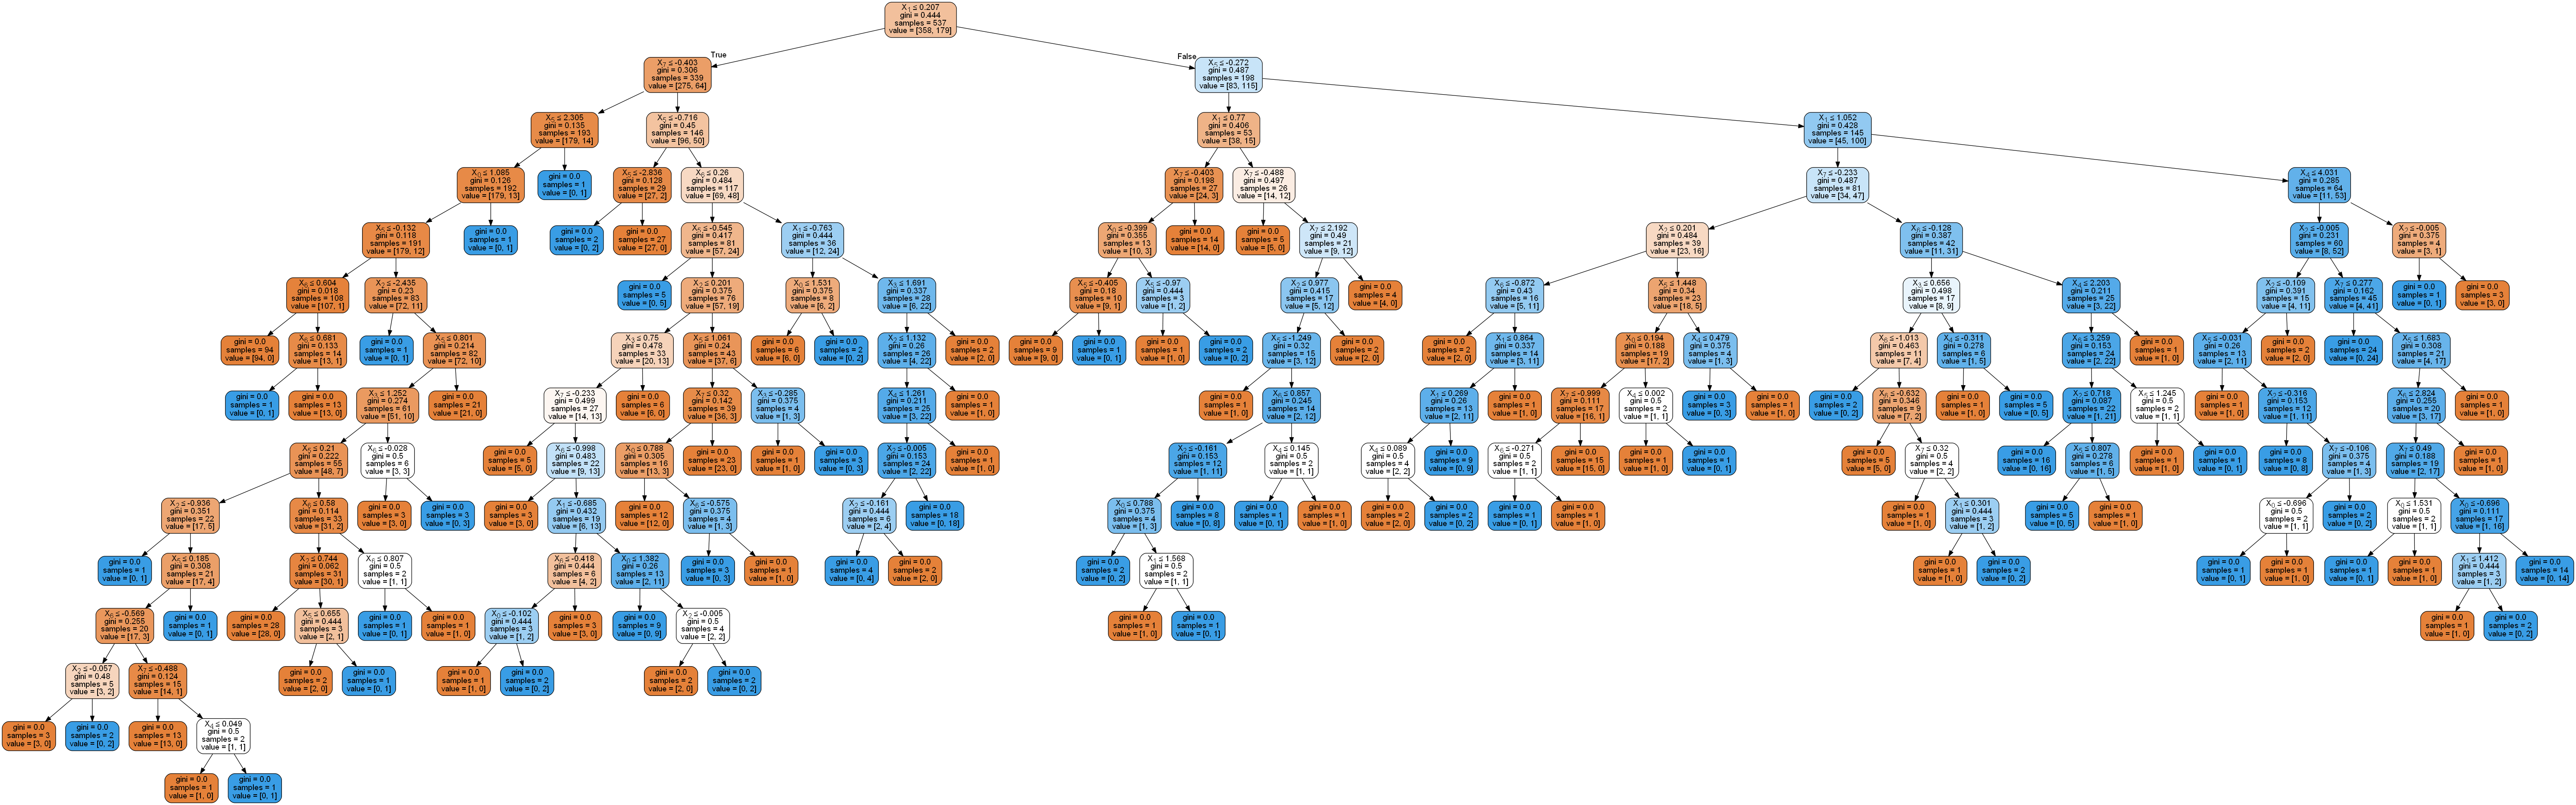

In [97]:
dtc6 = DecisionTreeClassifier()
DT6 = dtc6.fit(X_train6,y_train6)
y_pred_dtc6 = dtc6.predict(X_test6)

dot_data = StringIO()
export_graphviz(DT6, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

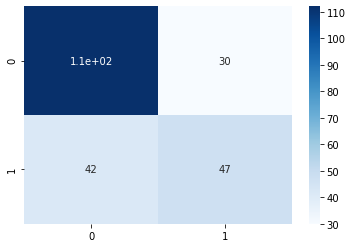

In [98]:
cm=confusion_matrix(y_test6,y_pred_dtc6)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [99]:
accuracy_score(y_test6,y_pred_dtc6)

0.6883116883116883

In [100]:
print(classification_report(y_test6, y_pred_dtc6))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       142
           1       0.61      0.53      0.57        89

    accuracy                           0.69       231
   macro avg       0.67      0.66      0.66       231
weighted avg       0.68      0.69      0.68       231



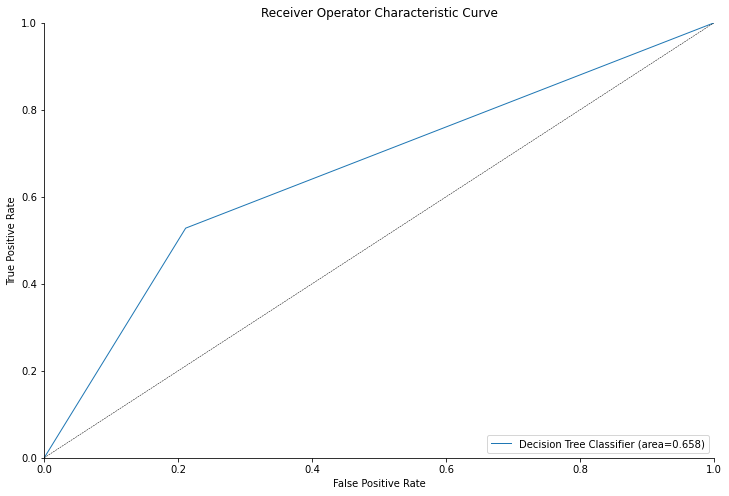

In [101]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test6,dtc6.predict_proba(X_test6),label='Decision Tree Classifier',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

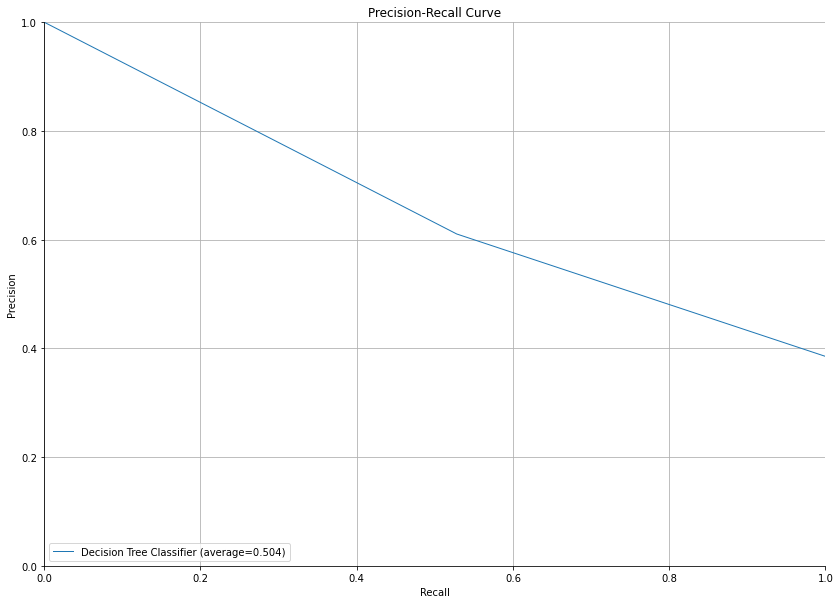

In [102]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test6,dtc6.predict_proba(X_test6),label='Decision Tree Classifier',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Gradient Boosting Machine

In [103]:
gbm6 = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm6.fit(X_train6,y_train6)
y_pred_gbm6 = gbm6.predict(X_test6)

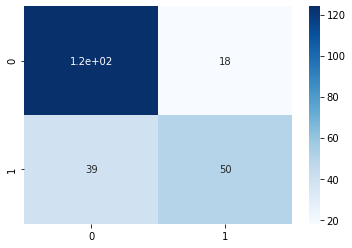

In [104]:
cm=confusion_matrix(y_test6,y_pred_gbm6)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [105]:
accuracy_score(y_test6,y_pred_gbm6)

0.7532467532467533

In [106]:
print(classification_report(y_test6, y_pred_gbm6))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       142
           1       0.74      0.56      0.64        89

    accuracy                           0.75       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.75      0.75      0.75       231



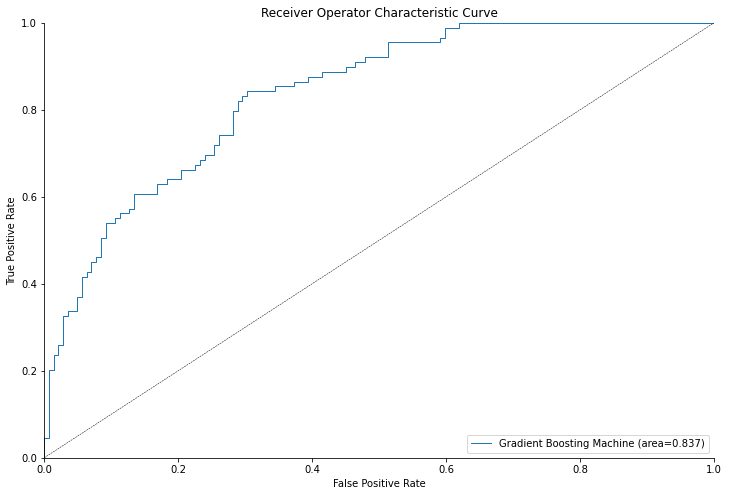

In [107]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test6,gbm6.predict_proba(X_test6),label='Gradient Boosting Machine',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

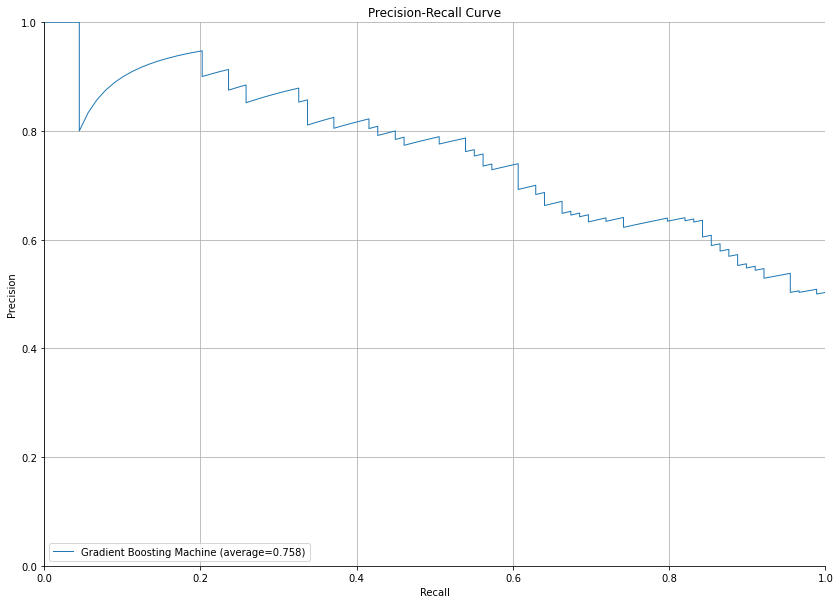

In [108]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test6,gbm6.predict_proba(X_test6),label='Gradient Boosting Machine',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Comparison of All Models

Model	/ Accuracy	/ Precision	/ Sensitivity	/ Specificity	/ F1 Score	/ ROC	/ Log_Loss	/ mathew_corrcoef

In [109]:
CM6=confusion_matrix(y_test6,y_pred_rfe6)
#sns.heatmap(CM, annot=True)

TN6 = CM6[0][0]
FN6 = CM6[1][0]
TP6 = CM6[1][1]
FP6 = CM6[0][1]
specificity6 = TN6/(TN6+FP6)
loss_log6 = log_loss(y_test6, y_pred_rfe6)
acc6= accuracy_score(y_test6, y_pred_rfe6)
roc6=roc_auc_score(y_test6, y_pred_rfe6)
prec6 = precision_score(y_test6, y_pred_rfe6)
rec6 = recall_score(y_test6, y_pred_rfe6)
f1_6 = f1_score(y_test6, y_pred_rfe6)

mathew6 = matthews_corrcoef(y_test6, y_pred_rfe6)
model_results6 =pd.DataFrame([['Random Forest',acc6, prec6,rec6,specificity6, f1_6,roc6, loss_log6,mathew6]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results6

Model  Accuracy  Precision  Sensitivity  Specificity  F1 Score  \
0  Random Forest  0.774892   0.768116     0.595506     0.887324  0.670886   

        ROC  Log_Loss  mathew_corrcoef  
0  0.741415  7.775018         0.513394

In [110]:
data6 = {        'MLP': y_pred_mlp6, 
                'KNN': y_pred_knn6, 
                'EXtra tree classifier': y_pred_et_100_6,
                'XGB': y_pred_xgb6, 
                'SVC': y_pred_svc6, 
                'SGD': y_pred_sgd6,
                'Adaboost': y_pred_ada6, 
                'CART': y_pred_dtc6, 
                'GBM': y_pred_gbm6 }

models6 = pd.DataFrame(data6) 
 
for column6 in models6:
    CM6=confusion_matrix(y_test6,models6[column6])
    
    TN6 = CM6[0][0]
    FN6 = CM6[1][0]
    TP6 = CM6[1][1]
    FP6 = CM6[0][1]
    specificity6 = TN6/(TN6+FP6)
    loss_log6 = log_loss(y_test6, models6[column6])
    acc6= accuracy_score(y_test6, models6[column6])
    roc6=roc_auc_score(y_test6, models6[column6])
    prec6 = precision_score(y_test6, models6[column6])
    rec6 = recall_score(y_test6, models6[column6])
    f1_6 = f1_score(y_test6, models6[column6])
    mathew6 = matthews_corrcoef(y_test6, models6[column6])
    
    results6 =pd.DataFrame([[column6,acc6, prec6,rec6,specificity6, f1_6,roc6, loss_log6,mathew6]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    model_results6 = model_results6.append(results6, ignore_index = True)


model_results6

Model  Accuracy  Precision  Sensitivity  Specificity  \
0          Random Forest  0.774892   0.768116     0.595506     0.887324   
1                    MLP  0.731602   0.695652     0.539326     0.852113   
2                    KNN  0.718615   0.681818     0.505618     0.852113   
3  EXtra tree classifier  0.774892   0.768116     0.595506     0.887324   
4                    XGB  0.727273   0.662500     0.595506     0.809859   
5                    SVC  0.761905   0.783333     0.528090     0.908451   
6                    SGD  0.675325   0.594595     0.494382     0.788732   
7               Adaboost  0.753247   0.722222     0.584270     0.859155   
8                   CART  0.688312   0.610390     0.528090     0.788732   
9                    GBM  0.753247   0.735294     0.561798     0.873239   

   F1 Score       ROC   Log_Loss  mathew_corrcoef  
0  0.670886  0.741415   7.775018         0.513394  
1  0.607595  0.695719   9.270220         0.416218  
2  0.580645  0.678865   9.718776         0.385373  
3  0.670886  0.741415   7.775018         0.513394  
4  0.627219  0.702682   9.419760         0.414621  
5  0.630872  0.718270   8.223563         0.484496  
6  0.539877  0.641557  11.213992         0.295281  
7  0.645963  0.721712   8.522624         0.465902  
8  0.566265  0.658411  10.765437         0.327076  
9  0.636943  0.717519   8.522618         0.464534

# Findings:


AS we can see from above results, 'ExtraTree Classifier' tied with 'Random Forest' as best performers as they highest test accuracy of 0.774892, sensitivity of 0.60, specificity of 0.89, highest f1-score of 0.67 and lowest Log Loss of 7.8.

# ROC AUC Curve of Top Performing Models - Combined

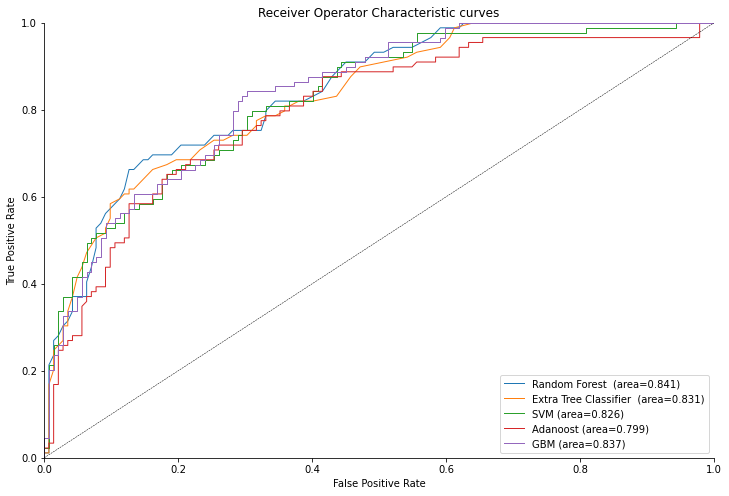

In [112]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))


roc_auc_plot(y_test6,rf_ent6.predict_proba(X_test6),label='Random Forest ',l='-')
roc_auc_plot(y_test6,et_100_6.predict_proba(X_test6),label='Extra Tree Classifier ',l='-')
roc_auc_plot(y_test6,svc6.predict_proba(X_test6),label='SVM',l='-')
roc_auc_plot(y_test6,ada6.predict_proba(X_test6),label='Adanoost',l='-')
roc_auc_plot(y_test6,gbm6.predict_proba(X_test6),label='GBM',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

# Precision Recall Curve of Top Performing Models - Combined

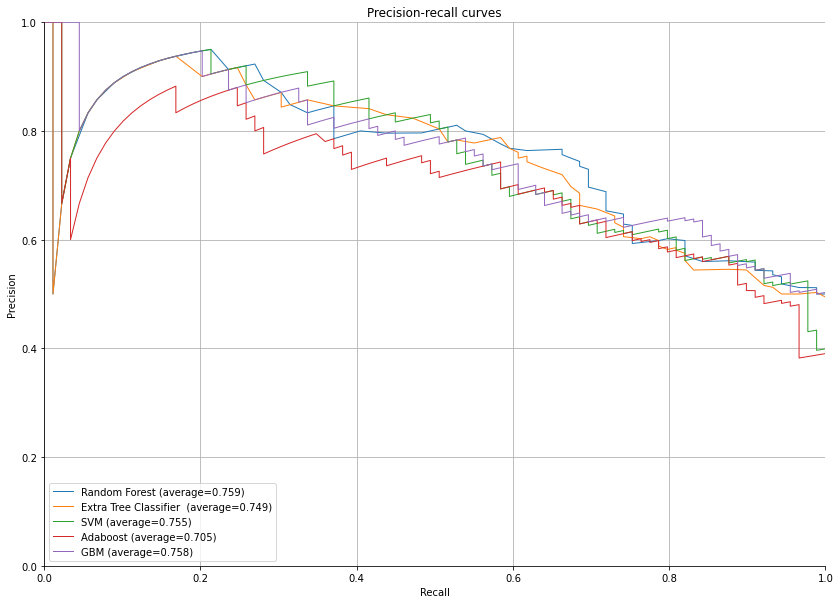

In [113]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test6,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test6, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test6,rf_ent6.predict_proba(X_test6),label='Random Forest',l='-')
precision_recall_plot(y_test6,et_100_6.predict_proba(X_test6),label='Extra Tree Classifier ',l='-')
precision_recall_plot(y_test6,svc6.predict_proba(X_test6),label='SVM',l='-')
precision_recall_plot(y_test6,ada6.predict_proba(X_test6),label='Adaboost',l='-')
precision_recall_plot(y_test6,gbm6.predict_proba(X_test6),label='GBM',l='-')

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()

# Feature Importance

<AxesSubplot:>

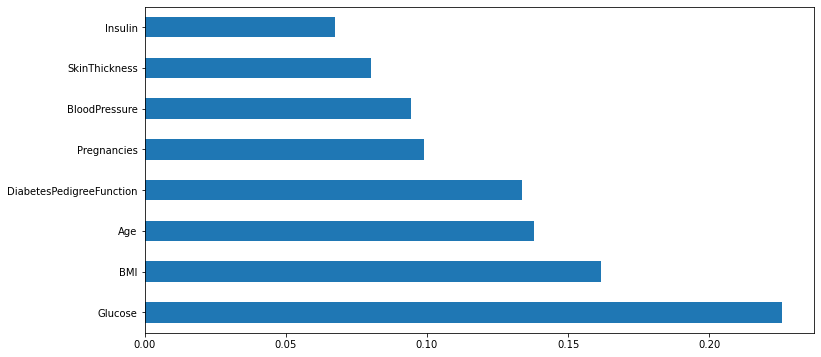

In [114]:
feat_importances = pd.Series(rf_ent6.feature_importances_, index=X_train6.columns)
feat_importances.nlargest(20).plot(kind='barh',figsize=(12,6))

<AxesSubplot:>

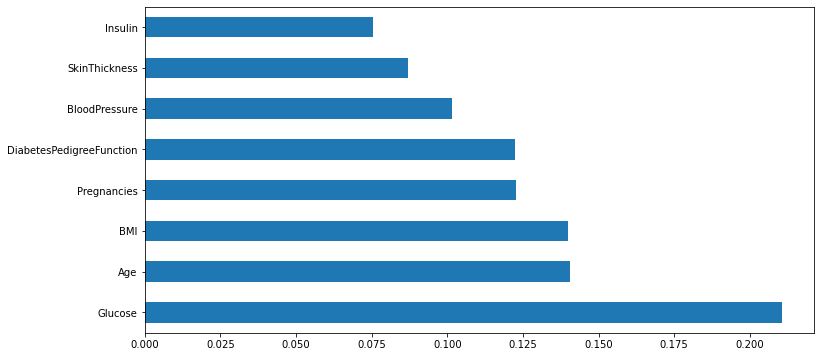

In [115]:
feat_importances = pd.Series(et_100_6.feature_importances_, index=X_train6.columns)
feat_importances.nlargest(20).plot(kind='barh',figsize=(12,6))

# Conclusion:
    
    
We see here that stacked ensemble of machine learning algorithms resulted in higher performance than any individual machine learning model.

The Top 5 most contributing features for both models are: Gluose', 'Age', 'BMI', 'Pregnancies' and 'DiabetesPedigreeFunction' even though the features may have ranked differently in both models.
